# Money Laudering Analysis

## Bibliotecas que serão usadas

In [1]:
import json
import time
import timeit
import numpy as np
import pandas as pd
from collections import Counter
from datetime import datetime,date,timedelta


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster import hierarchy
from sklearn.decomposition import PCA

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import pandas as pd
# import numpy as np
# import networkx as nx
from pyvis.network import Network

In [2]:
# pip install pyvis

## Funções de sumarização com janelamento no tempo

In [3]:
def features_count(X, delta, var, sufixo, var_group, date, type_window):
    data=X.copy()
    # contagem
    contadores_count = (data.set_index(date).sort_index()
    .groupby(var_group)[var]
    .rolling(f'{delta}{type_window}',closed='left',center=False)
    .count()
    ).reset_index().rename(columns={var:f'count_{var}_{delta}{type_window}_{sufixo}'})

    contadores_count = contadores_count.fillna(0)

    sub = var_group + [date]
    contadores_count = contadores_count.sort_values([date, f'count_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=sub, keep='first')
    # contadores_count = contadores_count.sort_values([date, f'count_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=[var_group, date], keep='first')
    # return pd.merge(data, contadores_count, on=[var_group,date], how = 'left', sort=False)
    return pd.merge(data, contadores_count, on=sub, how = 'left', sort=False)

def features_sum(X, delta, var, sufixo, var_group, date, type_window):
  data = X.copy()
  # soma
  contadores_sum = (data.set_index(date).sort_index()
  .groupby(var_group)[var]
  .rolling(f'{delta}{type_window}', closed='left', center=False)
  .sum()
  ).reset_index().rename(columns={var: f'sum_{var}_{delta}{type_window}_{sufixo}'})

  contadores_sum = contadores_sum.fillna(0)
  sub = var_group + [date]
  contadores_sum = contadores_sum.sort_values([date, f'sum_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=sub, keep='first')
  # contadores_sum = contadores_sum.sort_values([date, f'sum_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=[var_group, date], keep='first')
  # return pd.merge(data, contadores_sum, on=[var_group, date], how='left', sort=False)
  return pd.merge(data, contadores_sum, on=sub, how='left', sort=False)


def features_max(X, delta, var, sufixo, var_group, date, type_window):
  data= X.copy()
  #max
  contadores_max = (data.set_index(date).sort_index()
  .groupby(var_group)[var]
  .rolling(f'{delta}{type_window}',closed= 'left', center=False)
  .max()
  ).reset_index().rename(columns={var:f'max_{var}_{delta}{type_window}_{sufixo}'})

  contadores_max = contadores_max.fillna(0)
  sub = var_group + [date]
  contadores_max = contadores_max.sort_values([date, f'max_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=sub, keep='first')
  # contadores_max = contadores_max.sort_values([date, f'max_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=[var_group, date], keep='first')
  # return pd.merge(data, contadores_max, on=[var_group, date], how='left', sort=False)
  return pd.merge(data, contadores_max, on=sub, how='left', sort=False)


def features_min(X, delta, var, sufixo, var_group, date, type_window):
  data= X.copy()
  #min
  contadores_min = (data.set_index(date).sort_index()
  .groupby(var_group)[var]
  .rolling(f'{delta}{type_window}',closed= 'left', center=False)
  .min()
  ).reset_index().rename(columns={var:f'min_{var}_{delta}{type_window}_{sufixo}'})

  contadores_min = contadores_min.fillna(0)
  sub = var_group + [date]
  contadores_min = contadores_min.sort_values([date, f'min_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=sub, keep='first')
  # contadores_min = contadores_min.sort_values([date, f'min_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=[var_group, date], keep='first')
  # return pd.merge(data, contadores_min, on=[var_group, date], how='left', sort=False)
  return pd.merge(data, contadores_min, on=sub, how='left', sort=False)


def features_mean(X, delta, var, sufixo, var_group, date, type_window):
  data= X.copy()
  #mean
  contadores_mean = (data.set_index(date).sort_index()
  .groupby(var_group)[var]
  .rolling(f'{delta}{type_window}',closed= 'left', center=False)
  .mean()
  ).reset_index().rename(columns={var:f'mean_{var}_{delta}{type_window}_{sufixo}'})

  contadores_mean = contadores_mean.fillna(0)
  sub = var_group + [date]
  contadores_mean = contadores_mean.sort_values([date, f'mean_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=sub, keep='first')
  # contadores_mean = contadores_mean.sort_values([date, f'mean_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=[var_group, date], keep='first')
  # return pd.merge(data, contadores_mean, on=[var_group, date], how='left', sort=False)
  return pd.merge(data, contadores_mean, on=sub, how='left', sort=False)



def features_std(X, delta, var, sufixo, var_group, date, type_window):
  data= X.copy()
  #std
  contadores_std = (data.set_index(date).sort_index()
  .groupby(var_group)[var]
  .rolling(f'{delta}{type_window}',closed= 'left', center=False)
  .std()
  ).reset_index().rename(columns={var:f'std_{var}_{delta}{type_window}_{sufixo}'})

  contadores_std = contadores_std.fillna(0)
  sub = var_group + [date]
  contadores_std = contadores_std.sort_values([date, f'std_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=sub, keep='first')
  # contadores_std = contadores_std.sort_values([date, f'std_{var}_{delta}{type_window}_{sufixo}']).drop_duplicates(subset=[var_group, date], keep='first')
  # return pd.merge(data, contadores_std, on=[var_group, date], how='left', sort=False)
  return pd.merge(data, contadores_std, on=sub, how='left', sort=False)

## Experimento

In [4]:
# dataset = pd.read_excel('./data/base_dados_raw.xlsx')
dataset = pd.read_csv('./data/base_dados.csv')
dataset.shape

(9322, 18)

In [5]:
dataset.NOME_BANCO.value_counts()

NOME_BANCO
ITAU UNIBANCO S/A                4705
BANCO DO ESTADO DE SERGIPE SA    2816
Banco do Brasil                  1612
BANCO BRADESCO S/A                153
CAIXA ECONOMICA FEDERAL            36
Name: count, dtype: int64

In [6]:
dataset.head()

,Unnamed: 0,NUMERO_CASO,NUMERO_BANCO,NOME_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,NOME_TITULAR,DESCRICAO_LANCAMENTO,DATA_LANCAMENTO,NUMERO_DOCUMENTO,NUMERO_DOCUMENTO_TRANSACAO,VALOR_TRANSACAO,NATUREZA_LANCAMENTO,NUMERO_BANCO_OD,NUMERO_AGENCIA_OD,NUMERO_CONTA_OD,OBSERVACAO
0,60,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,SISPAG GROUPON R1359362,2013-01-02,1359362,1359362,32,C,341.0,646.0,745232,NaN
1,61,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,IOF,2013-01-02,0,0,42,D,NaN,NaN,NaN,NaN
2,62,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,SEGURO RESIDENCIA 01/12,2013-01-03,0,0,43,D,NaN,NaN,NaN,NaN
3,63,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,LIS/JUROS,2013-01-07,0,0,102,D,NaN,NaN,NaN,NaN
4,64,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,SISPAG GROUPON R1409072,2013-01-08,1409072,1409072,32,C,341.0,646.0,745232,NaN


In [7]:
dataset.isnull().sum()

Unnamed: 0                       0
NUMERO_CASO                      0
NUMERO_BANCO                     0
NOME_BANCO                       0
NUMERO_AGENCIA                   0
NUMERO_CONTA                     0
TIPO                             0
NOME_TITULAR                     0
DESCRICAO_LANCAMENTO             0
DATA_LANCAMENTO                  0
NUMERO_DOCUMENTO                 0
NUMERO_DOCUMENTO_TRANSACAO       0
VALOR_TRANSACAO                  0
NATUREZA_LANCAMENTO              0
NUMERO_BANCO_OD               3903
NUMERO_AGENCIA_OD             5956
NUMERO_CONTA_OD               5956
OBSERVACAO                    5374
dtype: int64

In [8]:
dataset.NUMERO_AGENCIA_OD.value_counts()

NUMERO_AGENCIA_OD
0.0       579
1402.0    387
14.0      350
9295.0    278
34.0      167
         ... 
3459.0      1
8124.0      1
1258.0      1
635.0       1
3234.0      1
Name: count, Length: 275, dtype: int64

In [9]:
dataset.NOME_TITULAR.value_counts()

NOME_TITULAR
MEVIO FILHO    4053
MEVIO          2854
GIRASSOL       1397
TÍCIO          1018
Name: count, dtype: int64

In [10]:
dataset.NOME_TITULAR.value_counts().sum()

9322

In [11]:
dataset.NOME_BANCO.value_counts()

NOME_BANCO
ITAU UNIBANCO S/A                4705
BANCO DO ESTADO DE SERGIPE SA    2816
Banco do Brasil                  1612
BANCO BRADESCO S/A                153
CAIXA ECONOMICA FEDERAL            36
Name: count, dtype: int64

In [12]:
dataset.TIPO.value_counts()

TIPO
1    8098
2    1224
Name: count, dtype: int64

In [13]:
dataset.NATUREZA_LANCAMENTO.value_counts()

NATUREZA_LANCAMENTO
D    5746
C    3483
*      93
Name: count, dtype: int64

In [14]:
5746/9322

0.6163913323321176

In [15]:
dataset = dataset[dataset['NATUREZA_LANCAMENTO'].isin(['D', 'C'])]
dataset.NATUREZA_LANCAMENTO.value_counts()

NATUREZA_LANCAMENTO
D    5746
C    3483
Name: count, dtype: int64

In [16]:
dataset['VALOR_TRANSACAO'].sum()

17495417

In [17]:
dataset[dataset['NATUREZA_LANCAMENTO']=='C']['VALOR_TRANSACAO'].sum()

8742969

In [18]:
dataset[dataset['NATUREZA_LANCAMENTO']=='D']['VALOR_TRANSACAO'].sum()

8752448

In [19]:
dataset.head()

,Unnamed: 0,NUMERO_CASO,NUMERO_BANCO,NOME_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,NOME_TITULAR,DESCRICAO_LANCAMENTO,DATA_LANCAMENTO,NUMERO_DOCUMENTO,NUMERO_DOCUMENTO_TRANSACAO,VALOR_TRANSACAO,NATUREZA_LANCAMENTO,NUMERO_BANCO_OD,NUMERO_AGENCIA_OD,NUMERO_CONTA_OD,OBSERVACAO
0,60,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,SISPAG GROUPON R1359362,2013-01-02,1359362,1359362,32,C,341.0,646.0,745232,NaN
1,61,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,IOF,2013-01-02,0,0,42,D,NaN,NaN,NaN,NaN
2,62,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,SEGURO RESIDENCIA 01/12,2013-01-03,0,0,43,D,NaN,NaN,NaN,NaN
3,63,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,LIS/JUROS,2013-01-07,0,0,102,D,NaN,NaN,NaN,NaN
4,64,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,SISPAG GROUPON R1409072,2013-01-08,1409072,1409072,32,C,341.0,646.0,745232,NaN


In [20]:
# dataset.DESCRICAO_LANCAMENTO.value_counts().to_csv('descricao_lancamento.csv')

In [21]:
# # Filtrando as linhas que contêm as palavras "SAQUE" ou "deposito"
# filtro = dataset.DESCRICAO_LANCAMENTO.str.contains('SAQUE|CASH|SAQ', case=False, na=False)

# # Selecionando as linhas que atendem ao filtro
# linhas_filtradas = dataset[filtro]

# DEPOSITO

In [22]:
# dataset['saque'] = filtro.astype(int)

In [23]:
# dataset['saque'].sum()

In [24]:
# linhas_filtradas.NOME_TITULAR.value_counts()

In [25]:

# from wordcloud import WordCloud

# # Supondo que a variável 'DESCRICAO_LANCAMENTO' esteja no dataset
# texto = " ".join(descricao for descricao in dataset.DESCRICAO_LANCAMENTO.astype(str))

# # Gerando a word cloud
# wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(texto)

# # Plotando a word cloud
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

### Dataprep 

In [26]:
dataset =  dataset[dataset['NATUREZA_LANCAMENTO']=='D']
# dataset =  dataset[dataset['saque']==1]

In [27]:
filtro = dataset.DESCRICAO_LANCAMENTO.str.contains('SAQUE|CASH|SAQ', case=False, na=False)
linhas_filtradas = dataset[filtro]
linhas_filtradas.DESCRICAO_LANCAMENTO.value_counts()

DESCRICAO_LANCAMENTO
SAQUE terminal              218
SAQUE CART CASH             136
SAQ.INTERAG. - CASH         109
SAQUE CARTAO - CAIXA        100
SAQUE COM CARTAO             71
                           ... 
AG. SAQUE 000521.001008       1
TAR SAQUE AGENCIA  01/15      1
AG. SAQUE 001925.001008       1
AG. SAQUE 002659.001008       1
CXE     001040 SAQUE          1
Name: count, Length: 270, dtype: int64

In [28]:
# dataset = dataset.dropna(subset=['NUMERO_AGENCIA_OD'])

Vamos considerar que cada linha é uma transação distinta, para isso o index pode ser considerado o indicador da chave

In [29]:
dataset = dataset.reset_index()
dataset = dataset.rename(columns={"index": 'chave'})
dataset.head()

,chave,Unnamed: 0,NUMERO_CASO,NUMERO_BANCO,NOME_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,NOME_TITULAR,DESCRICAO_LANCAMENTO,DATA_LANCAMENTO,NUMERO_DOCUMENTO,NUMERO_DOCUMENTO_TRANSACAO,VALOR_TRANSACAO,NATUREZA_LANCAMENTO,NUMERO_BANCO_OD,NUMERO_AGENCIA_OD,NUMERO_CONTA_OD,OBSERVACAO
0,1,61,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,IOF,2013-01-02,0,0,42,D,NaN,NaN,NaN,NaN
1,2,62,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,SEGURO RESIDENCIA 01/12,2013-01-03,0,0,43,D,NaN,NaN,NaN,NaN
2,3,63,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,LIS/JUROS,2013-01-07,0,0,102,D,NaN,NaN,NaN,NaN
3,5,65,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,CONSORC ITAU P018/080,2013-01-10,0,0,936,D,NaN,NaN,NaN,NaN
4,6,66,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,CXE 001024 SAQUE,2013-01-11,1024,1024,700,D,NaN,NaN,NaN,NaN


In [30]:
dataset['safra'] = dataset['DATA_LANCAMENTO'].apply(lambda x: str(x)[0:4] + str(x)[5:7])
# dataset.safra.value_counts()

In [31]:
# Método antigo para definir chave
# dataset['chave'] = dataset.NUMERO_CONTA.astype(str) + dataset.DATA_LANCAMENTO.astype(str) + dataset.NOME_BANCO.astype(str) + dataset.NUMERO_DOCUMENTO_TRANSACAO.astype(str) + dataset.VALOR_TRANSACAO.astype(str) 
# dataset.drop_duplicates(subset=['chave'], keep='last').shape
# dataset_2 = dataset.drop_duplicates(subset=['chave'], keep='last')

In [32]:
dataset['data_tran'] = pd.to_datetime(dataset['DATA_LANCAMENTO'], format="%Y-%m-%d")
dataset['VALOR_TRANSACAO'] = dataset['VALOR_TRANSACAO'].astype(float)

In [33]:
# Criando um identificador único para cada combinação de banco e agência
# dataset['ORIGEM'] = dataset['NUMERO_BANCO'].astype(str)  + '-' + dataset['NUMERO_AGENCIA'].astype(str) + '-' + dataset['NUMERO_CONTA'].astype(str)
# dataset['DESTINO'] = dataset['NUMERO_BANCO_OD'].astype(str)  + '-' + dataset['NUMERO_AGENCIA_OD'].astype(str) + '-' + dataset['NUMERO_CONTA_OD'].astype(str)

### Feature engineering

In [34]:

# variáveis para quantidade de transações por conta com janela em horas
var_count='chave'
var_groupby=['NOME_TITULAR'] 
sufixo='titular'
type_window='D'
date = 'data_tran'


dataset = features_count(X=dataset, delta=7, var=var_count, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_count(X=dataset, delta=30, var=var_count, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
dataset = features_count(X=dataset, delta=60, var=var_count, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
dataset = features_count(X=dataset, delta=180, var=var_count, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)

In [35]:
# # variáveis para quantidade de transações por conta e por tipo de transação com janela em horas
# var_count='chave'
# var_groupby=['NOME_TITULAR', 'TIPO'] 
# sufixo='titular_tipo'
# type_window='D'
# date = 'data_tran'


# dataset = features_count(X=dataset, delta=7, var=var_count, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# # dataset = features_count(X=dataset, delta=30, var=var_count, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_count(X=dataset, delta=30, var=var_count, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_count(X=dataset, delta=90, var=var_count, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)

In [36]:
### variáveis para valor da transação por conta com janela em dias
var_val='VALOR_TRANSACAO'
var_count= 'chave'
var_groupby=['NOME_TITULAR']
sufixo='titular'
date='data_tran'
type_window='D'

# Variáveis para soma das transações
dataset = features_sum(X=dataset, delta=7, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_sum(X=dataset, delta=30, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
dataset = features_sum(X=dataset, delta=60, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
dataset = features_sum(X=dataset, delta=180, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)

# Variáveis para média das transações
dataset = features_mean(X=dataset, delta=7, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_mean(X=dataset, delta=30, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
dataset = features_mean(X=dataset, delta=60, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
dataset = features_mean(X=dataset, delta=180, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)

# Variáveis para máximo das transações
dataset = features_max(X=dataset, delta=7, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_max(X=dataset, delta=30, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
dataset = features_max(X=dataset, delta=60, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
dataset = features_max(X=dataset, delta=180, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)

# Variáveis para mínimo das transações
dataset = features_min(X=dataset, delta=7, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_min(X=dataset, delta=30, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
dataset = features_min(X=dataset, delta=60, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
dataset = features_min(X=dataset, delta=180, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)

# Variáveis para desvio padrão das transações
dataset = features_std(X=dataset, delta=7, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_std(X=dataset, delta=30, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
dataset = features_std(X=dataset, delta=60, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
dataset = features_std(X=dataset, delta=180, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)

In [37]:
# ### variáveis para valor da transação por conta e por tipo de transação com janela em dias
# var_val='VALOR_TRANSACAO'
# var_count= 'chave'
# var_groupby=['NOME_TITULAR', 'TIPO']
# sufixo='titular_tipo'
# date='data_tran'
# type_window='D'

# # Variáveis para soma das transações
# # dataset = features_sum(X=dataset, delta=1, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_sum(X=dataset, delta=7, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_sum(X=dataset, delta=30, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_sum(X=dataset, delta=90, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)

# # Variáveis para média das transações
# # dataset = features_mean(X=dataset, delta=1, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_mean(X=dataset, delta=7, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_mean(X=dataset, delta=30, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_mean(X=dataset, delta=90, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)

# # Variáveis para máximo das transações
# # dataset = features_max(X=dataset, delta=1, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_max(X=dataset, delta=7, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_max(X=dataset, delta=30, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_max(X=dataset, delta=90, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)

# # Variáveis para mínimo das transações
# # dataset = features_min(X=dataset, delta=1, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_min(X=dataset, delta=7, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_min(X=dataset, delta=30, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_min(X=dataset, delta=90, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)

# # Variáveis para desvio padrão das transações
# # dataset = features_std(X=dataset, delta=1, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_std(X=dataset, delta=7, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_std(X=dataset, delta=30, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)
# dataset = features_std(X=dataset, delta=90, var=var_val, sufixo=sufixo, var_group=var_groupby, date=date, type_window=type_window)

In [38]:
dataset.head()

,chave,Unnamed: 0,NUMERO_CASO,NUMERO_BANCO,NOME_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,NOME_TITULAR,DESCRICAO_LANCAMENTO,...,mean_VALOR_TRANSACAO_180D_titular,max_VALOR_TRANSACAO_7D_titular,max_VALOR_TRANSACAO_60D_titular,max_VALOR_TRANSACAO_180D_titular,min_VALOR_TRANSACAO_7D_titular,min_VALOR_TRANSACAO_60D_titular,min_VALOR_TRANSACAO_180D_titular,std_VALOR_TRANSACAO_7D_titular,std_VALOR_TRANSACAO_60D_titular,std_VALOR_TRANSACAO_180D_titular
0,1,61,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,IOF,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,2,62,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,SEGURO RESIDENCIA 01/12,...,419.750000,1546.0,1546.0,1546.0,7.0,7.0,7.0,751.492903,751.492903,751.492903
2,3,63,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,LIS/JUROS,...,293.333333,1546.0,1546.0,1546.0,7.0,7.0,7.0,614.167947,614.167947,614.167947
3,5,65,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,CONSORC ITAU P018/080,...,404.000000,1040.0,1546.0,1546.0,38.0,7.0,7.0,486.885510,565.799925,565.799925
4,6,66,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,CXE 001024 SAQUE,...,572.666667,1896.0,1896.0,1896.0,102.0,7.0,7.0,667.313420,677.486844,677.486844


In [39]:
dataset.columns

Index(['chave', 'Unnamed: 0', 'NUMERO_CASO', 'NUMERO_BANCO', 'NOME_BANCO',
       'NUMERO_AGENCIA', 'NUMERO_CONTA', 'TIPO', 'NOME_TITULAR',
       'DESCRICAO_LANCAMENTO', 'DATA_LANCAMENTO', 'NUMERO_DOCUMENTO',
       'NUMERO_DOCUMENTO_TRANSACAO', 'VALOR_TRANSACAO', 'NATUREZA_LANCAMENTO',
       'NUMERO_BANCO_OD', 'NUMERO_AGENCIA_OD', 'NUMERO_CONTA_OD', 'OBSERVACAO',
       'safra', 'data_tran', 'count_chave_7D_titular',
       'count_chave_60D_titular', 'count_chave_180D_titular',
       'sum_VALOR_TRANSACAO_7D_titular', 'sum_VALOR_TRANSACAO_60D_titular',
       'sum_VALOR_TRANSACAO_180D_titular', 'mean_VALOR_TRANSACAO_7D_titular',
       'mean_VALOR_TRANSACAO_60D_titular', 'mean_VALOR_TRANSACAO_180D_titular',
       'max_VALOR_TRANSACAO_7D_titular', 'max_VALOR_TRANSACAO_60D_titular',
       'max_VALOR_TRANSACAO_180D_titular', 'min_VALOR_TRANSACAO_7D_titular',
       'min_VALOR_TRANSACAO_60D_titular', 'min_VALOR_TRANSACAO_180D_titular',
       'std_VALOR_TRANSACAO_7D_titular', 'std_VAL

In [40]:
data = dataset.drop(columns=['chave', 'Unnamed: 0', 'NUMERO_CASO', 'NUMERO_BANCO', 'NOME_BANCO',
       'NUMERO_AGENCIA', 'NUMERO_CONTA', 'TIPO', 'NOME_TITULAR',
       'DESCRICAO_LANCAMENTO', 'DATA_LANCAMENTO', 'NUMERO_DOCUMENTO',
       'NUMERO_DOCUMENTO_TRANSACAO', 'NATUREZA_LANCAMENTO',
       'NUMERO_BANCO_OD', 'NUMERO_AGENCIA_OD', 'NUMERO_CONTA_OD', 'OBSERVACAO',
       'data_tran', 'safra'])

In [41]:
data.head()

,VALOR_TRANSACAO,count_chave_7D_titular,count_chave_60D_titular,count_chave_180D_titular,sum_VALOR_TRANSACAO_7D_titular,sum_VALOR_TRANSACAO_60D_titular,sum_VALOR_TRANSACAO_180D_titular,mean_VALOR_TRANSACAO_7D_titular,mean_VALOR_TRANSACAO_60D_titular,mean_VALOR_TRANSACAO_180D_titular,max_VALOR_TRANSACAO_7D_titular,max_VALOR_TRANSACAO_60D_titular,max_VALOR_TRANSACAO_180D_titular,min_VALOR_TRANSACAO_7D_titular,min_VALOR_TRANSACAO_60D_titular,min_VALOR_TRANSACAO_180D_titular,std_VALOR_TRANSACAO_7D_titular,std_VALOR_TRANSACAO_60D_titular,std_VALOR_TRANSACAO_180D_titular
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,43.0,4.0,4.0,4.0,1679.0,1679.0,1679.0,419.750000,419.750000,419.750000,1546.0,1546.0,1546.0,7.0,7.0,7.0,751.492903,751.492903,751.492903
2,102.0,6.0,6.0,6.0,1760.0,1760.0,1760.0,293.333333,293.333333,293.333333,1546.0,1546.0,1546.0,7.0,7.0,7.0,614.167947,614.167947,614.167947
3,936.0,6.0,10.0,10.0,2361.0,4040.0,4040.0,393.500000,404.000000,404.000000,1040.0,1546.0,1546.0,38.0,7.0,7.0,486.885510,565.799925,565.799925
4,700.0,6.0,12.0,12.0,5112.0,6872.0,6872.0,852.000000,572.666667,572.666667,1896.0,1896.0,1896.0,102.0,7.0,7.0,667.313420,677.486844,677.486844


### Análise descritiva

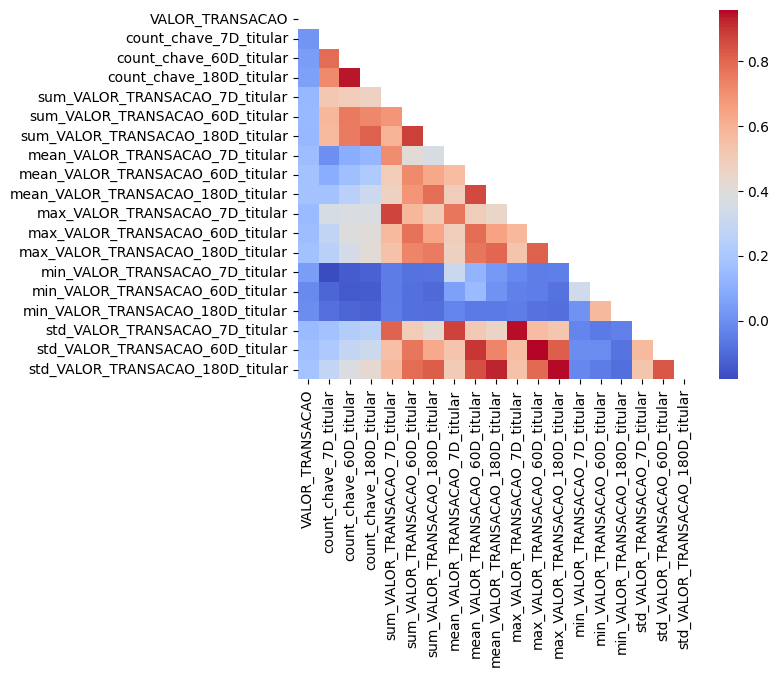

In [42]:
corrmat = np.triu(data.corr(method='pearson'))
g = sns.heatmap(data.corr(method='pearson'),cmap="coolwarm",annot=False, mask = corrmat, fmt=".2f")

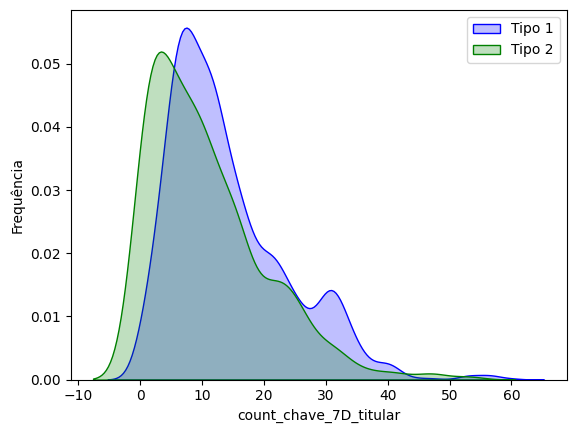

In [43]:
g = sns.kdeplot(dataset["count_chave_7D_titular"][(dataset["TIPO"] == 1) & (dataset["count_chave_7D_titular"].notnull())], color="Blue", fill = True)
g = sns.kdeplot(dataset["count_chave_7D_titular"][(dataset["TIPO"] == 2) & (dataset["count_chave_7D_titular"].notnull())], ax =g, color="Green", fill= True)

g.set_xlabel("count_chave_7D_titular")
g.set_ylabel("Frequência")
g = g.legend(['Tipo 1', 'Tipo 2'])

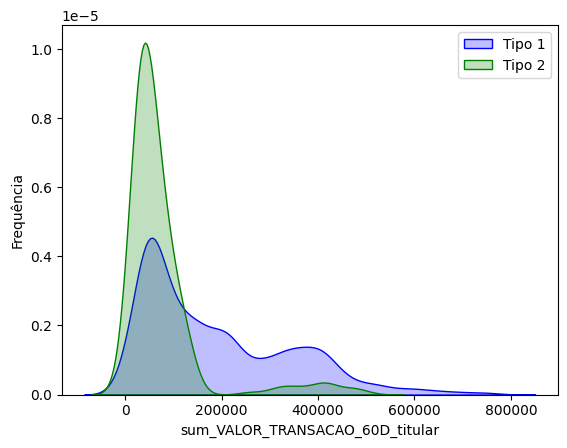

In [44]:
g = sns.kdeplot(dataset["sum_VALOR_TRANSACAO_60D_titular"][(dataset["TIPO"] == 1) & (dataset["sum_VALOR_TRANSACAO_60D_titular"].notnull())], color="Blue", fill = True)
g = sns.kdeplot(dataset["sum_VALOR_TRANSACAO_60D_titular"][(dataset["TIPO"] == 2) & (dataset["sum_VALOR_TRANSACAO_60D_titular"].notnull())], ax =g, color="Green", fill= True)

g.set_xlabel("sum_VALOR_TRANSACAO_60D_titular")
g.set_ylabel("Frequência")
g = g.legend(['Tipo 1', 'Tipo 2'])

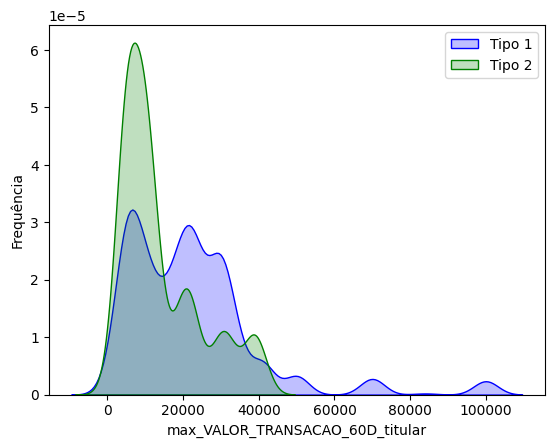

In [45]:
g = sns.kdeplot(dataset["max_VALOR_TRANSACAO_60D_titular"][(dataset["TIPO"] == 1) & (dataset["max_VALOR_TRANSACAO_60D_titular"].notnull())], color="Blue", fill = True)
g = sns.kdeplot(dataset["max_VALOR_TRANSACAO_60D_titular"][(dataset["TIPO"] == 2) & (dataset["max_VALOR_TRANSACAO_60D_titular"].notnull())], ax =g, color="Green", fill= True)

g.set_xlabel("max_VALOR_TRANSACAO_60D_titular")
g.set_ylabel("Frequência")
g = g.legend(['Tipo 1', 'Tipo 2'])

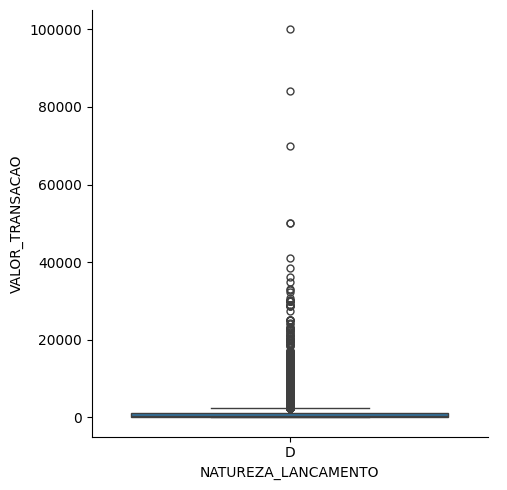

In [46]:
g = sns.catplot(y="VALOR_TRANSACAO",x="NATUREZA_LANCAMENTO",data=dataset,kind="box")

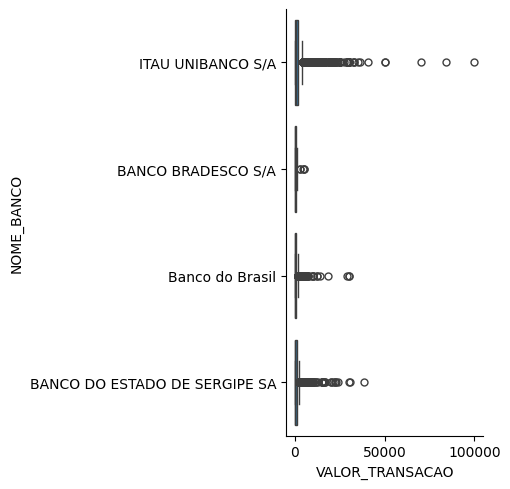

In [47]:
g = sns.catplot(x="VALOR_TRANSACAO",y="NOME_BANCO",data=dataset,kind="box")

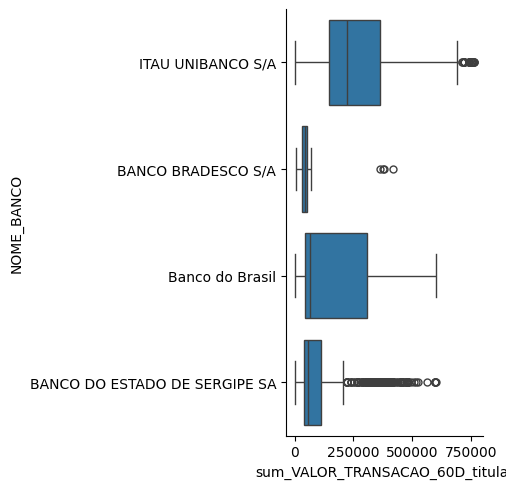

In [48]:
g = sns.catplot(x="sum_VALOR_TRANSACAO_60D_titular",y="NOME_BANCO",data=dataset,kind="box")

<Figure size 500x1500 with 0 Axes>

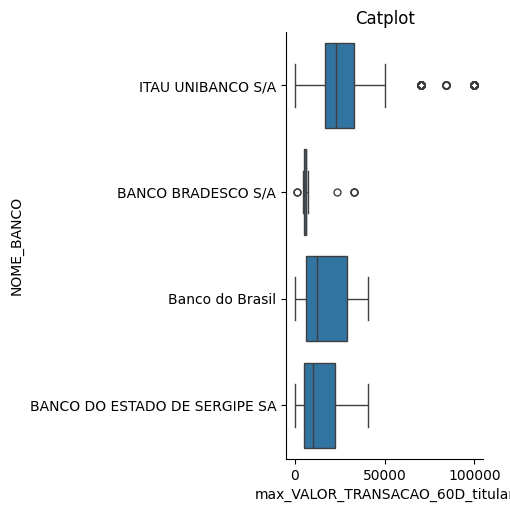

In [49]:
plt.figure(figsize=(5, 15)) 

sns.catplot(x="max_VALOR_TRANSACAO_60D_titular",y="NOME_BANCO",data=dataset,kind="box")

# Adicione título e rótulos aos eixos, se necessário
plt.title("Catplot")
plt.xlabel("max_VALOR_TRANSACAO_60D_titular")
plt.ylabel("NOME_BANCO")

# Mostre o catplot
plt.show()

In [50]:
# Agrupe os dados por safra e calcule a soma da quantidade e dos valores para cada safra
dados_agrupados = dataset.groupby('safra').agg({'chave':'count', 'VALOR_TRANSACAO':'sum'}).reset_index()
dados_agrupados 

,safra,chave,VALOR_TRANSACAO
0,201301,129,97174.0
1,201302,119,105677.0
2,201303,126,145774.0
3,201304,121,107448.0
4,201305,137,113501.0
5,201306,108,98206.0
6,201307,111,138874.0
7,201308,168,149904.0
8,201309,134,98044.0
9,201310,198,165938.0


In [52]:
dados_agrupados.safra.unique()

array(['201301', '201302', '201303', '201304', '201305', '201306',
       '201307', '201308', '201309', '201310', '201311', '201312',
       '201401', '201402', '201403', '201404', '201405', '201406',
       '201407', '201408', '201409', '201410', '201411', '201412',
       '201501', '201502', '201503', '201504', '201505', '201506',
       '201507', '201508', '201509', '201510'], dtype=object)

In [58]:
# Dicionário de meses
months = {
    '01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May', '06': 'Jun',
    '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'
}

# Função para substituir
def convert_period(p):
    year = p[:4]
    month_num = p[4:]
    month_str = months.get(month_num, 'Unknown')
    return f"{month_str}/{year}"

# Aplicar na coluna
dados_agrupados['anomes'] = dados_agrupados['safra'].apply(convert_period)

In [59]:
dados_agrupados['anomes'] 

0     Jan/2013
1     Feb/2013
2     Mar/2013
3     Apr/2013
4     May/2013
5     Jun/2013
6     Jul/2013
7     Aug/2013
8     Sep/2013
9     Oct/2013
10    Nov/2013
11    Dec/2013
12    Jan/2014
13    Feb/2014
14    Mar/2014
15    Apr/2014
16    May/2014
17    Jun/2014
18    Jul/2014
19    Aug/2014
20    Sep/2014
21    Oct/2014
22    Nov/2014
23    Dec/2014
24    Jan/2015
25    Feb/2015
26    Mar/2015
27    Apr/2015
28    May/2015
29    Jun/2015
30    Jul/2015
31    Aug/2015
32    Sep/2015
33    Oct/2015
Name: anomes, dtype: object

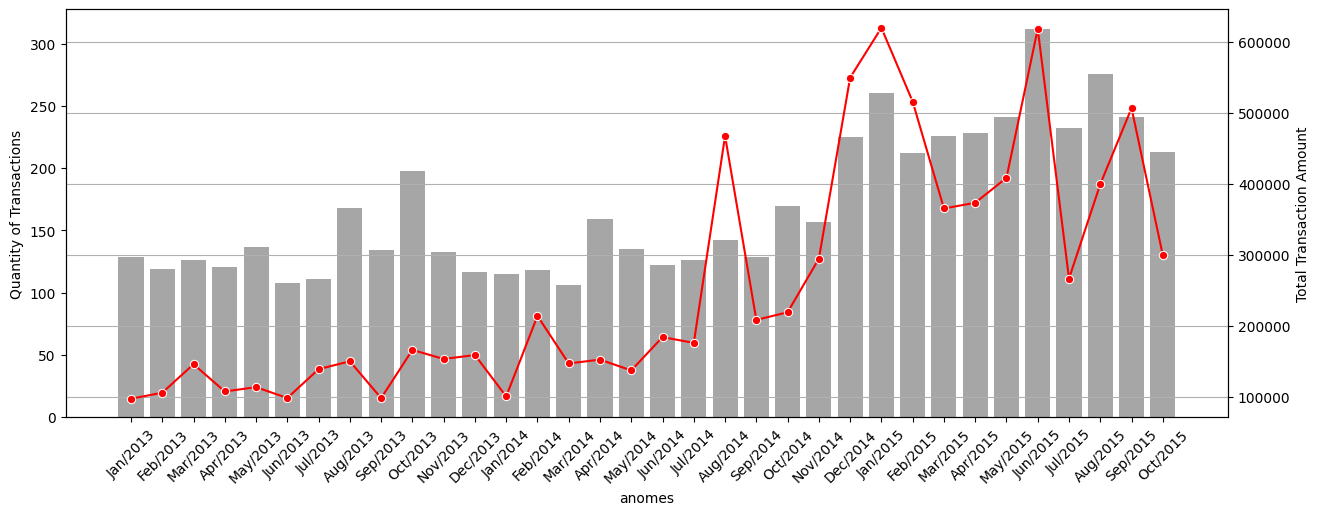

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Agrupe os dados por safra e calcule a soma da quantidade e dos valores para cada safra

# Defina o tamanho da figura
plt.figure(figsize=(15, 6))

# Plot da distribuição agrupada de quantidade como barras
sns.barplot(x='anomes', y='chave', data=dados_agrupados, color='gray', alpha=0.7)
plt.xticks(rotation=45)
plt.ylabel('Quantity of Transactions')
# Adicione um eixo secundário para as linhas
plt.subplots_adjust(bottom=0.2)
plt.twinx()

# Plot da distribuição agrupada de valores como linhas
sns.lineplot(x='anomes', y='VALOR_TRANSACAO', data=dados_agrupados, marker='o', color='red')

# Adicione título e rótulos dos eixos
# plt.title('Soma da Quantidade (barras) e Valor de Transação (linhas) por Safra')
plt.xlabel('Period')
plt.ylabel('Total Transaction Amount')

# Gire os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45)
# plt.xticks(range(len(dados_agrupados['safra'])), dados_agrupados['safra'], rotation=45)


# Exiba o gráfico
plt.grid(True)
plt.show()

### Feature Selection

In [49]:
def remove_correlated_features(data, threshold):
    """
    Remove variáveis correlacionadas com base em um limiar.
    
    Parâmetros:
    - data: DataFrame Pandas contendo as variáveis.
    - threshold: O limiar de correlação a ser usado para remover variáveis.
    
    Retorna:
    - DataFrame Pandas contendo apenas as variáveis não correlacionadas.
    - Lista das variáveis removidas.
    """
    # Calcula a matriz de correlação
    corr_matrix = data.corr().abs()
    
    # Cria uma matriz booleana com True onde a correlação é maior que o limiar
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
    
    # Obtém as colunas a serem removidas
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # Remove as colunas
    data_filtered = data.drop(to_drop, axis=1)
    
    # Retorna as variáveis removidas e as que permaneceram
    removed_features = [column for column in data.columns if column in to_drop]
    remaining_features = [column for column in data.columns if column not in to_drop]
    
    return data_filtered, removed_features, remaining_features

In [50]:
threshold = 0.95  # Defina o limiar de correlação
dados, removed_features, remaining_features  = remove_correlated_features(data, threshold)

In [51]:
print("Quantidade de features removidas:", len(removed_features))
print("Quantidade de features selecionadas:", len(remaining_features))

Quantidade de features removidas: 2
Quantidade de features selecionadas: 17


In [116]:
removed_features

['std_VALOR_TRANSACAO_60D_titular', 'std_VALOR_TRANSACAO_180D_titular']

In [52]:
dados.columns

Index(['VALOR_TRANSACAO', 'count_chave_7D_titular', 'count_chave_60D_titular',
       'count_chave_180D_titular', 'sum_VALOR_TRANSACAO_7D_titular',
       'sum_VALOR_TRANSACAO_60D_titular', 'sum_VALOR_TRANSACAO_180D_titular',
       'mean_VALOR_TRANSACAO_7D_titular', 'mean_VALOR_TRANSACAO_60D_titular',
       'mean_VALOR_TRANSACAO_180D_titular', 'max_VALOR_TRANSACAO_7D_titular',
       'max_VALOR_TRANSACAO_60D_titular', 'max_VALOR_TRANSACAO_180D_titular',
       'min_VALOR_TRANSACAO_7D_titular', 'min_VALOR_TRANSACAO_60D_titular',
       'min_VALOR_TRANSACAO_180D_titular', 'std_VALOR_TRANSACAO_7D_titular'],
      dtype='object')

In [119]:
1065/(1065+4066+615)

0.18534632788026453

In [53]:
from scipy.stats import ks_2samp

In [54]:
dist1 = dados['VALOR_TRANSACAO']
dist2 = dados['mean_VALOR_TRANSACAO_7D_titular']

# Teste KS
ks_statistic, p_value = ks_2samp(dist1, dist2)
p_value

0.0

In [55]:
dados.head()

,VALOR_TRANSACAO,count_chave_7D_titular,count_chave_60D_titular,count_chave_180D_titular,sum_VALOR_TRANSACAO_7D_titular,sum_VALOR_TRANSACAO_60D_titular,sum_VALOR_TRANSACAO_180D_titular,mean_VALOR_TRANSACAO_7D_titular,mean_VALOR_TRANSACAO_60D_titular,mean_VALOR_TRANSACAO_180D_titular,max_VALOR_TRANSACAO_7D_titular,max_VALOR_TRANSACAO_60D_titular,max_VALOR_TRANSACAO_180D_titular,min_VALOR_TRANSACAO_7D_titular,min_VALOR_TRANSACAO_60D_titular,min_VALOR_TRANSACAO_180D_titular,std_VALOR_TRANSACAO_7D_titular
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,43.0,4.0,4.0,4.0,1679.0,1679.0,1679.0,419.750000,419.750000,419.750000,1546.0,1546.0,1546.0,7.0,7.0,7.0,751.492903
2,102.0,6.0,6.0,6.0,1760.0,1760.0,1760.0,293.333333,293.333333,293.333333,1546.0,1546.0,1546.0,7.0,7.0,7.0,614.167947
3,936.0,6.0,10.0,10.0,2361.0,4040.0,4040.0,393.500000,404.000000,404.000000,1040.0,1546.0,1546.0,38.0,7.0,7.0,486.885510
4,700.0,6.0,12.0,12.0,5112.0,6872.0,6872.0,852.000000,572.666667,572.666667,1896.0,1896.0,1896.0,102.0,7.0,7.0,667.313420


In [56]:
# dados = dados[(dados != 0).all(axis=1)]

In [57]:
dados.shape

(5746, 17)

In [58]:
dados.head()

,VALOR_TRANSACAO,count_chave_7D_titular,count_chave_60D_titular,count_chave_180D_titular,sum_VALOR_TRANSACAO_7D_titular,sum_VALOR_TRANSACAO_60D_titular,sum_VALOR_TRANSACAO_180D_titular,mean_VALOR_TRANSACAO_7D_titular,mean_VALOR_TRANSACAO_60D_titular,mean_VALOR_TRANSACAO_180D_titular,max_VALOR_TRANSACAO_7D_titular,max_VALOR_TRANSACAO_60D_titular,max_VALOR_TRANSACAO_180D_titular,min_VALOR_TRANSACAO_7D_titular,min_VALOR_TRANSACAO_60D_titular,min_VALOR_TRANSACAO_180D_titular,std_VALOR_TRANSACAO_7D_titular
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,43.0,4.0,4.0,4.0,1679.0,1679.0,1679.0,419.750000,419.750000,419.750000,1546.0,1546.0,1546.0,7.0,7.0,7.0,751.492903
2,102.0,6.0,6.0,6.0,1760.0,1760.0,1760.0,293.333333,293.333333,293.333333,1546.0,1546.0,1546.0,7.0,7.0,7.0,614.167947
3,936.0,6.0,10.0,10.0,2361.0,4040.0,4040.0,393.500000,404.000000,404.000000,1040.0,1546.0,1546.0,38.0,7.0,7.0,486.885510
4,700.0,6.0,12.0,12.0,5112.0,6872.0,6872.0,852.000000,572.666667,572.666667,1896.0,1896.0,1896.0,102.0,7.0,7.0,667.313420


### Modelagem com K-means

In [59]:
# scaler = StandardScaler()
# dados_p = pd.DataFrame(scaler.fit_transform(dados))

minmax = MinMaxScaler()
dados_p = pd.DataFrame(minmax.fit_transform(dados))

In [60]:
dados_p.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.00042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.0000,0.000000,0.000000,0.000000
1,0.00043,0.066667,0.012698,0.005168,0.007341,0.002192,0.001155,0.017724,0.070420,0.098230,0.01546,0.01546,0.01546,0.0007,0.023333,0.023333,0.021176
2,0.00102,0.100000,0.019048,0.007752,0.007696,0.002298,0.001211,0.012386,0.049211,0.068646,0.01546,0.01546,0.01546,0.0007,0.023333,0.023333,0.017307
3,0.00936,0.100000,0.031746,0.012920,0.010323,0.005275,0.002780,0.016615,0.067778,0.094544,0.01040,0.01546,0.01546,0.0038,0.023333,0.023333,0.013720
4,0.00700,0.100000,0.038095,0.015504,0.022352,0.008973,0.004728,0.035975,0.096074,0.134016,0.01896,0.01896,0.01896,0.0102,0.023333,0.023333,0.018804


In [61]:
# pca = PCA(n_components=0.85)  # Manter 95% da variância
# dados_p = pca.fit_transform(dados_p)

In [62]:
dados_p.shape

(5746, 17)

In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
kmeans = KMeans(n_clusters=10, max_iter=1,init='k-means++', n_init=30, random_state=42)
kmeans.fit(dados_p)

centroides = kmeans.cluster_centers_

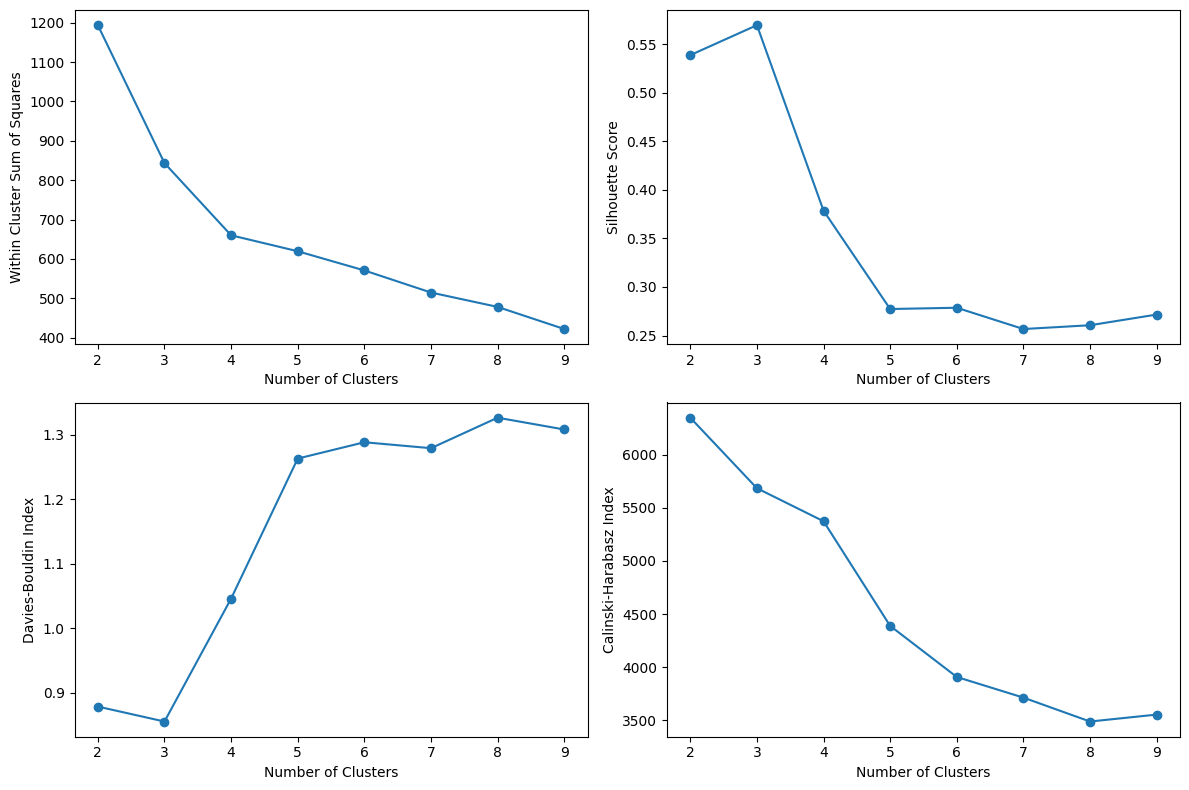

,score_wss,silhueta,davies_bouldin,calinski_harabasz
2,1193.8,0.5386,0.8786,6348.2451
3,843.5,0.5694,0.8554,5684.5182
4,660.1,0.3785,1.0461,5373.6921
5,619.6,0.2773,1.2633,4388.7042
6,570.8,0.2786,1.2886,3908.0393
7,514.7,0.2567,1.2794,3713.8378
8,478.2,0.2606,1.3267,3488.7708
9,422.0,0.2716,1.3084,3554.0988


In [65]:
# Definindo os valores de k
k_values = range(2, 10)
first = True

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=10, init=centroides[0:k, :], n_init=1, random_state=32)
    cluster_labels = kmeans.fit_predict(dados_p)
    
    # WCSS (Within Cluster Sum of Squares)
    score_wss = round(kmeans.inertia_, 1)
    
    # Silhouette Score
    silhueta = round(silhouette_score(dados_p, cluster_labels), 4)
    
    # Davies-Bouldin Index
    db_index = round(davies_bouldin_score(dados_p, cluster_labels), 4)
    
    # Calinski-Harabasz Index
    ch_index = round(calinski_harabasz_score(dados_p, cluster_labels), 4)
    
    # Criando um DataFrame com os resultados
    resultados_aux = {
        'score_wss': score_wss,
        'silhueta': silhueta,
        'davies_bouldin': db_index,
        'calinski_harabasz': ch_index
    }
    
    resultados_aux = pd.DataFrame(resultados_aux, index=[k])
    
    if first:
        resultados_final = resultados_aux
        first = False
    else:
        resultados_final = pd.concat([resultados_final, resultados_aux], axis=0)

# Plotando WCSS
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(resultados_final.index, resultados_final.score_wss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
# plt.title('Cotovelo')

# Plotando Silhouette Score
plt.subplot(2, 2, 2)
plt.plot(resultados_final.index, resultados_final.silhueta, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
# plt.title('Silhouette')

# Plotando Davies-Bouldin Index
plt.subplot(2, 2, 3)
plt.plot(resultados_final.index, resultados_final.davies_bouldin, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
# plt.title('Davies-Bouldin')

# Plotando Calinski-Harabasz Index
plt.subplot(2, 2, 4)
plt.plot(resultados_final.index, resultados_final.calinski_harabasz, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
# plt.title('Calinski-Harabasz')

plt.tight_layout()
plt.show()

resultados_final


Text(0, 0.5, 'Within Cluster Sum of Squares')

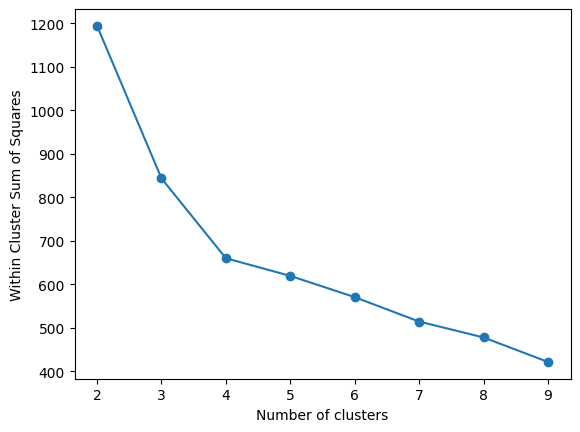

In [66]:
plt.plot(resultados_final.index, resultados_final.score_wss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')

Text(0, 0.5, 'Silhouette Score')

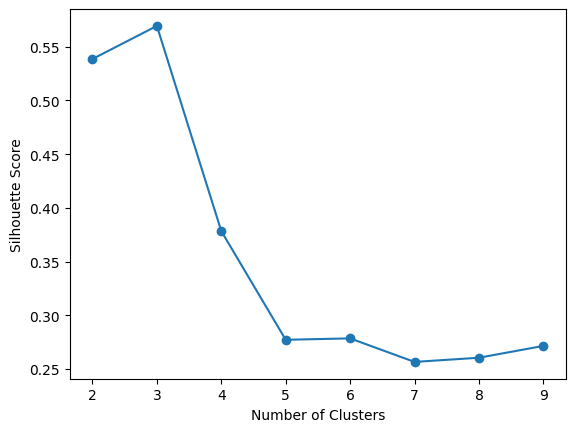

In [67]:
plt.plot(resultados_final.index, resultados_final.silhueta, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

Text(0, 0.5, 'Davies-Bouldin Index')

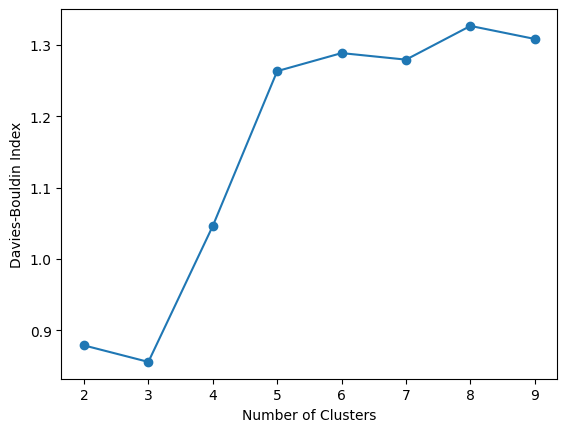

In [68]:
plt.plot(resultados_final.index, resultados_final.davies_bouldin, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')

In [69]:
KM_final = KMeans(n_clusters = 3, init = centroides[0:3,:], n_init = 1, max_iter=50, random_state=42)

KM_final.fit(dados_p)
clusters_labels = KM_final.predict(dados_p)

print ('Centroides: ', KM_final.cluster_centers_)
print ('\nInertia ou WCSS: ',KM_final.inertia_)
print ('\nClusters preditos: ' , clusters_labels)

Centroides:  [[1.22308288e-02 1.69363830e-01 2.38723756e-01 2.61299031e-01
  5.23540584e-02 1.18564541e-01 1.64687207e-01 5.25107917e-02
  1.97668209e-01 2.59441396e-01 5.57944417e-02 1.41624250e-01
  1.77711193e-01 1.21090507e-02 1.32365962e-02 5.89112969e-03
  5.09249827e-02]
 [1.53470986e-02 4.74084507e-01 7.60339817e-01 7.82278512e-01
  1.98095313e-01 4.98304269e-01 6.85323566e-01 6.90942787e-02
  2.72949481e-01 3.91949731e-01 1.58154526e-01 3.02049521e-01
  3.81607437e-01 6.94647887e-04 3.70266041e-03 1.02973396e-03
  9.88562737e-02]
 [3.48768618e-02 2.05067751e-01 3.34897406e-01 4.15325308e-01
  2.08419640e-01 4.85046887e-01 7.37116692e-01 1.63324955e-01
  5.77779303e-01 7.79482833e-01 2.06521870e-01 5.03553512e-01
  8.43447154e-01 9.47788618e-03 1.97289973e-03 1.83197832e-03
  1.79463590e-01]]

Inertia ou WCSS:  843.4876576224302

Clusters preditos:  [0 0 0 ... 0 0 0]


In [70]:
dataset['cluster'] = clusters_labels
dataset.loc[(dataset['cluster']==0), "cluster"] = 'cluster_1'
dataset.loc[(dataset['cluster']==1), "cluster"] = 'cluster_2'
dataset.loc[(dataset['cluster']==2), "cluster"] = 'cluster_3'
# dataset.loc[(dataset['cluster']==3), "cluster"] = 'cluster_4'

C:\Users\User\AppData\Local\Temp\ipykernel_2752\1213643946.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'cluster_1' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  dataset.loc[(dataset['cluster']==0), "cluster"] = 'cluster_1'


In [71]:
dataset.head()

,chave,Unnamed: 0,NUMERO_CASO,NUMERO_BANCO,NOME_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,NOME_TITULAR,DESCRICAO_LANCAMENTO,...,max_VALOR_TRANSACAO_7D_titular,max_VALOR_TRANSACAO_60D_titular,max_VALOR_TRANSACAO_180D_titular,min_VALOR_TRANSACAO_7D_titular,min_VALOR_TRANSACAO_60D_titular,min_VALOR_TRANSACAO_180D_titular,std_VALOR_TRANSACAO_7D_titular,std_VALOR_TRANSACAO_60D_titular,std_VALOR_TRANSACAO_180D_titular,cluster
0,1,61,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,IOF,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,cluster_1
1,2,62,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,SEGURO RESIDENCIA 01/12,...,1546.0,1546.0,1546.0,7.0,7.0,7.0,751.492903,751.492903,751.492903,cluster_1
2,3,63,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,LIS/JUROS,...,1546.0,1546.0,1546.0,7.0,7.0,7.0,614.167947,614.167947,614.167947,cluster_1
3,5,65,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,CONSORC ITAU P018/080,...,1040.0,1546.0,1546.0,38.0,7.0,7.0,486.885510,565.799925,565.799925,cluster_1
4,6,66,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,CXE 001024 SAQUE,...,1896.0,1896.0,1896.0,102.0,7.0,7.0,667.313420,677.486844,677.486844,cluster_1


### Análise descritiva dos Clusters

In [72]:
dataset[dataset['cluster']=='cluster_1']['VALOR_TRANSACAO'].describe()

count     4066.000000
mean      1223.082882
std       3168.936277
min          0.000000
25%         40.000000
50%        200.000000
75%       1000.000000
max      84000.000000
Name: VALOR_TRANSACAO, dtype: float64

In [73]:
dataset[dataset['cluster']=='cluster_2']['VALOR_TRANSACAO'].describe()

count     1065.000000
mean      1534.709859
std       3858.668642
min          0.000000
25%         92.000000
50%        400.000000
75%       1000.000000
max      33000.000000
Name: VALOR_TRANSACAO, dtype: float64

In [74]:
dataset[dataset['cluster']=='cluster_3']['VALOR_TRANSACAO'].describe()

count       615.000000
mean       3487.686179
std        7828.671254
min           0.000000
25%          67.500000
50%         900.000000
75%        2973.000000
max      100000.000000
Name: VALOR_TRANSACAO, dtype: float64

In [75]:
# dataset[dataset['cluster']=='cluster_4']['VALOR_TRANSACAO'].describe()

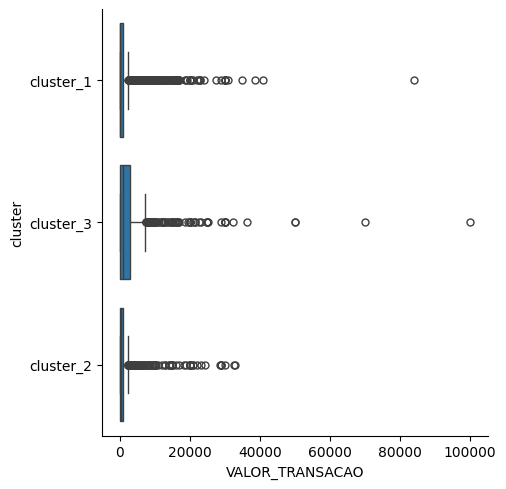

In [76]:
g = sns.catplot(x="VALOR_TRANSACAO",y="cluster",data=dataset,kind="box")

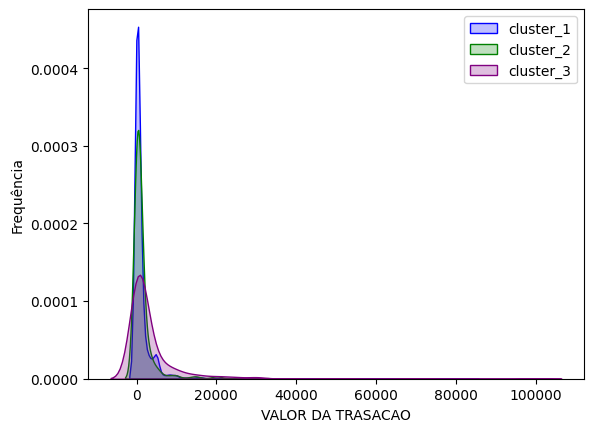

In [77]:
g = sns.kdeplot(dataset["VALOR_TRANSACAO"][(dataset["cluster"] == 'cluster_1') & (dataset["VALOR_TRANSACAO"].notnull())], color="Blue", fill = True)
g = sns.kdeplot(dataset["VALOR_TRANSACAO"][(dataset["cluster"] == 'cluster_2') & (dataset["VALOR_TRANSACAO"].notnull())], ax =g, color="Green", fill= True)
g = sns.kdeplot(dataset["VALOR_TRANSACAO"][(dataset["cluster"] == 'cluster_3') & (dataset["VALOR_TRANSACAO"].notnull())], ax =g, color="Purple", fill= True)
# g = sns.kdeplot(dataset["VALOR_TRANSACAO"][(dataset["cluster"] == 'cluster_4') & (dataset["VALOR_TRANSACAO"].notnull())], ax =g, color="Red", fill= True)
g.set_xlabel("VALOR DA TRASACAO")
g.set_ylabel("Frequência")
# g = g.legend(['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4'])
g = g.legend(['cluster_1', 'cluster_2', 'cluster_3'])

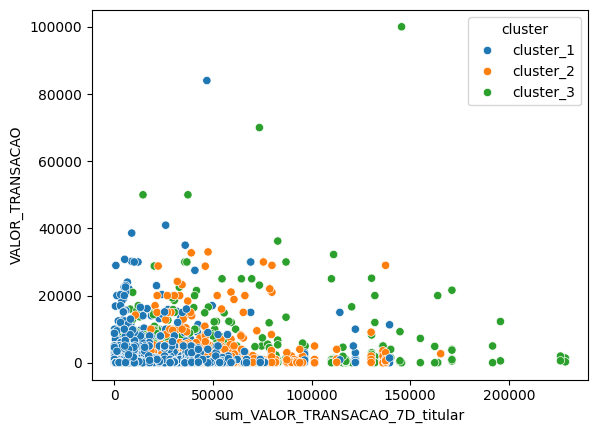

In [92]:
sns.scatterplot(x='sum_VALOR_TRANSACAO_7D_titular', 
                y='VALOR_TRANSACAO', 
                data=dataset, 
                # hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3", "cluster_4"],  sizes=(100))
                hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3"],  sizes=(100))
plt.show()

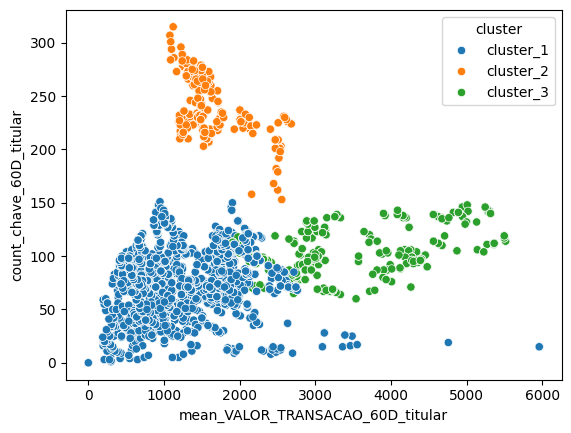

In [78]:
sns.scatterplot(x='mean_VALOR_TRANSACAO_60D_titular', 
                y='count_chave_60D_titular', 
                data=dataset, 
                # hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3", "cluster_4"],  sizes=(100))
                hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3"],  sizes=(100))
plt.show()

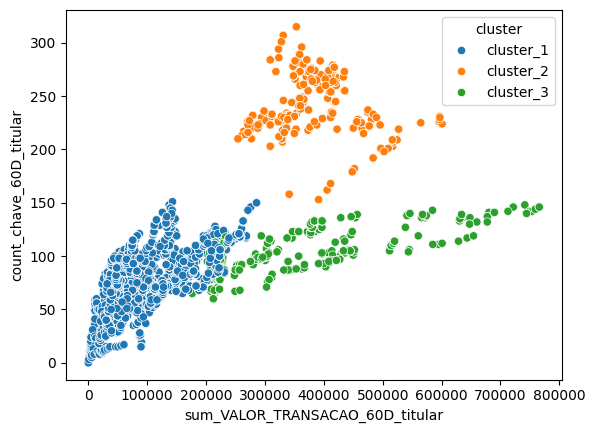

In [79]:
sns.scatterplot(x='sum_VALOR_TRANSACAO_60D_titular', 
                y='count_chave_60D_titular', 
                data=dataset, 
                # hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3", "cluster_4"],  sizes=(100))
                hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3"],  sizes=(100))
plt.show()

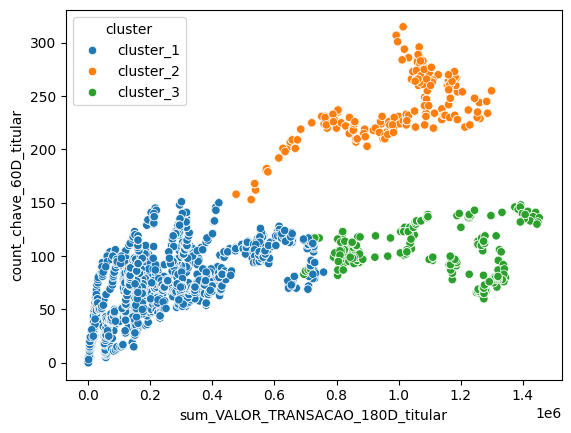

In [80]:
sns.scatterplot(x='sum_VALOR_TRANSACAO_180D_titular', 
                y='count_chave_60D_titular', 
                data=dataset, 
                # hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3", "cluster_4"],  sizes=(100))
                hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3"],  sizes=(100))
plt.show()

In [81]:
import plotly.express as px
ordered_clusters = ['cluster_1', 'cluster_2', 'cluster_3']


fig = px.scatter(
    dataset, 
    x='mean_VALOR_TRANSACAO_60D_titular', 
    y='count_chave_60D_titular', 
    color='cluster', 
    category_orders={'cluster': ordered_clusters},  # Define a ordem da legenda
    color_discrete_map={
        "cluster_1": "purple", 
        "cluster_2": "green", 
        "cluster_3": "blue"
    },
    opacity=0.5,
    size_max=10,
    labels={
        'mean_VALOR_TRANSACAO_60D_titular': 'Transaction amount mean (60 days)',
        'count_chave_60D_titular': 'Key count (60 days)',
        'cluster': 'Cluster'
    },
    width=800,
    height=600
)

# Alterando a posição da legenda
fig.update_layout(
    legend=dict(
        x=0.8,  # Posição horizontal (0 = esquerda, 1 = direita)
        y=0.2,  # Posição vertical (0 = fundo, 1 = topo)
        xanchor='center',  # Alinhamento horizontal da legenda
        yanchor='middle',  # Alinhamento vertical da legenda
        title='Cluster'  # Título da legenda
    )
)

fig.show()


In [491]:
import plotly.express as px

ordered_clusters = ['cluster_1', 'cluster_2', 'cluster_3']

fig = px.scatter(
    dataset, 
    x='std_VALOR_TRANSACAO_60D_titular', 
    y='count_chave_60D_titular', 
    color='cluster', 
    category_orders={'cluster': ordered_clusters},  # Define a ordem da legenda
    color_discrete_map={
        "cluster_1": "purple", 
        "cluster_2": "green", 
        "cluster_3": "blue"
    },
    opacity=0.5,
    size_max=10,
    labels={
        'std_VALOR_TRANSACAO_60D_titular': 'Transaction amount std (60 days)',
        'count_chave_60D_titular': 'Key count (60 days)',
        'cluster': 'Cluster'
    },
    width=800,
    height=600
)

# Alterando a posição da legenda
fig.update_layout(
    legend=dict(
        x=0.8,  # Posição horizontal (0 = esquerda, 1 = direita)
        y=0.2,  # Posição vertical (0 = fundo, 1 = topo)
        xanchor='center',  # Alinhamento horizontal da legenda
        yanchor='middle',  # Alinhamento vertical da legenda
        title='Cluster'  # Título da legenda
    )
)


In [487]:
import plotly.express as px

ordered_clusters = ['cluster_1', 'cluster_2', 'cluster_3']

fig = px.scatter(
    dataset, 
    x='sum_VALOR_TRANSACAO_60D_titular', 
    y='count_chave_60D_titular', 
    color='cluster', 
    category_orders={'cluster': ordered_clusters},  # Define a ordem da legenda
    color_discrete_map={
        "cluster_1": "purple", 
        "cluster_2": "green", 
        "cluster_3": "blue"
    },
    opacity=0.5,
    size_max=10,
    labels={
        'sum_VALOR_TRANSACAO_60D_titular': 'Transaction amount sum (60 days)',
        'count_chave_60D_titular': 'Key count (60 days)',
        'cluster': 'Cluster'
    },
    width=800,
    height=600
)

# Alterando a posição da legenda
fig.update_layout(
    legend=dict(
        x=0.8,  # Posição horizontal (0 = esquerda, 1 = direita)
        y=0.2,  # Posição vertical (0 = fundo, 1 = topo)
        xanchor='center',  # Alinhamento horizontal da legenda
        yanchor='middle',  # Alinhamento vertical da legenda
        title='Cluster'  # Título da legenda
    )
)

fig.show()




In [485]:
import plotly.express as px

# Ordenando os clusters manualmente
ordered_clusters = ['cluster_1', 'cluster_2', 'cluster_3']

fig = px.scatter(
    dataset, 
    x='max_VALOR_TRANSACAO_60D_titular', 
    y='count_chave_60D_titular', 
    color='cluster', 
    category_orders={'cluster': ordered_clusters},  # Define a ordem da legenda
    color_discrete_map={
        "cluster_1": "purple", 
        "cluster_2": "green", 
        "cluster_3": "blue"
    },
    opacity=0.5,
    size_max=10,
    labels={
        'max_VALOR_TRANSACAO_60D_titular': 'Transaction amount max (60 days)',
        'count_chave_60D_titular': 'Key count (60 days)',
        'cluster': 'Cluster'
    },
    width=800,
    height=600
)

# Alterando a posição da legenda
fig.update_layout(
    legend=dict(
        x=0.8,  # Posição horizontal (0 = esquerda, 1 = direita)
        y=0.2,  # Posição vertical (0 = fundo, 1 = topo)
        xanchor='center',  # Alinhamento horizontal da legenda
        yanchor='middle',  # Alinhamento vertical da legenda
        title='Cluster'  # Título da legenda
    )
)

fig.show()



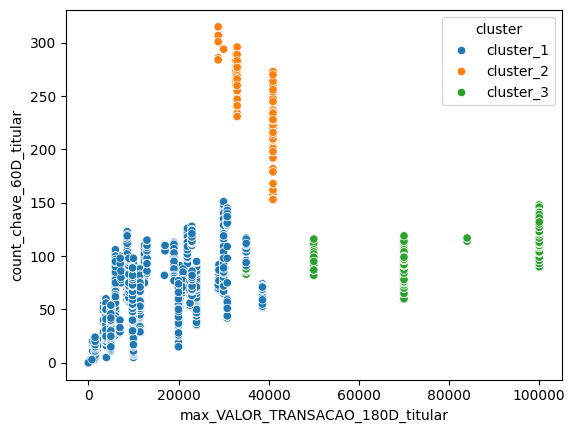

In [417]:
sns.scatterplot(x='max_VALOR_TRANSACAO_180D_titular', 
                y='count_chave_60D_titular', 
                data=dataset, 
                # hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3", "cluster_4"],  sizes=(100))
                hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3"],  sizes=(100))
plt.show()

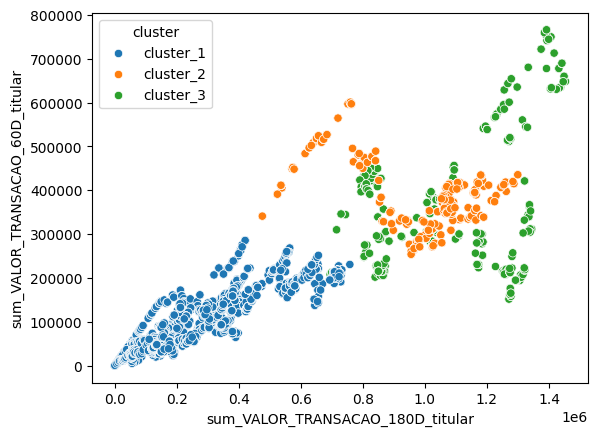

In [419]:
sns.scatterplot(x='sum_VALOR_TRANSACAO_180D_titular', 
                y='sum_VALOR_TRANSACAO_60D_titular', 
                data=dataset, 
                # hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3", "cluster_4"],  sizes=(100))
                                hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3"],  sizes=(100))
plt.show()

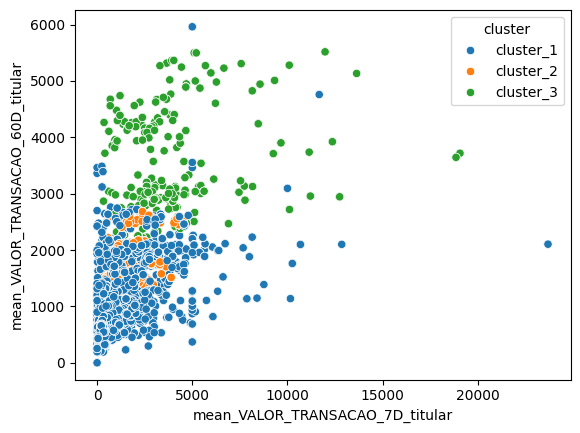

In [420]:
sns.scatterplot(x='mean_VALOR_TRANSACAO_7D_titular', 
                y='mean_VALOR_TRANSACAO_60D_titular', 
                data=dataset, 
                # hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3", "cluster_4"],  sizes=(100))
                                hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3"],  sizes=(100))
plt.show()

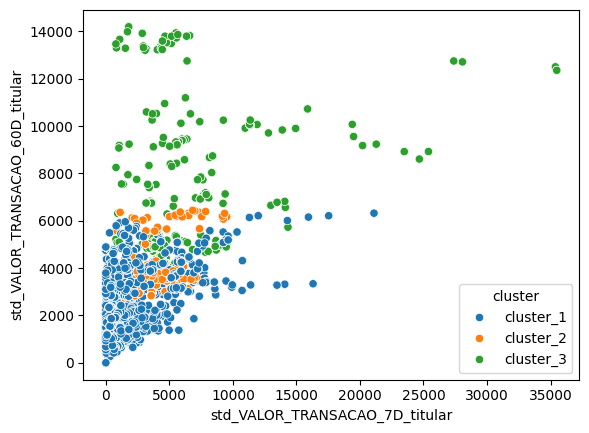

In [421]:
sns.scatterplot(x='std_VALOR_TRANSACAO_7D_titular', 
                y='std_VALOR_TRANSACAO_60D_titular', 
                data=dataset, 
                # hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3", "cluster_4"],  sizes=(100))
                                hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3"],  sizes=(100))
plt.show()

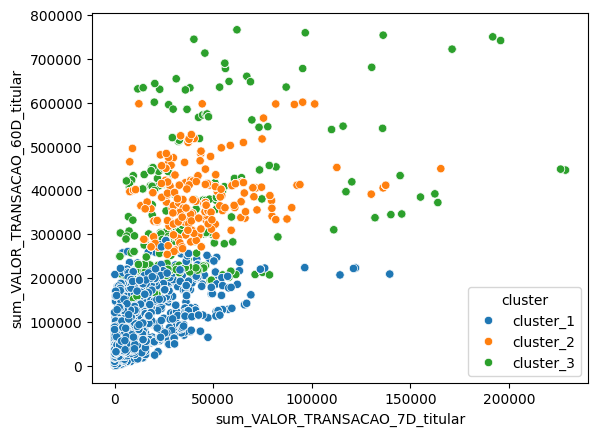

In [422]:
sns.scatterplot(x='sum_VALOR_TRANSACAO_7D_titular', 
                y='sum_VALOR_TRANSACAO_60D_titular', 
                data=dataset, 
                # hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3", "cluster_4"],  sizes=(100))
                                hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3"],  sizes=(100))
plt.show()

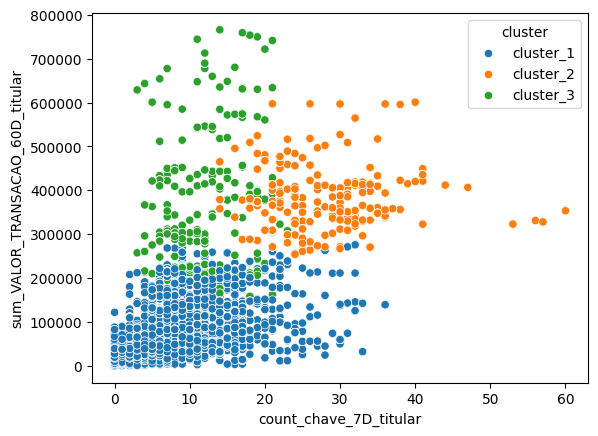

In [423]:
sns.scatterplot(x='count_chave_7D_titular', 
                y='sum_VALOR_TRANSACAO_60D_titular', 
                data=dataset, 
                # hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3", "cluster_4"],  sizes=(100))
                                hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3"],  sizes=(100))
plt.show()

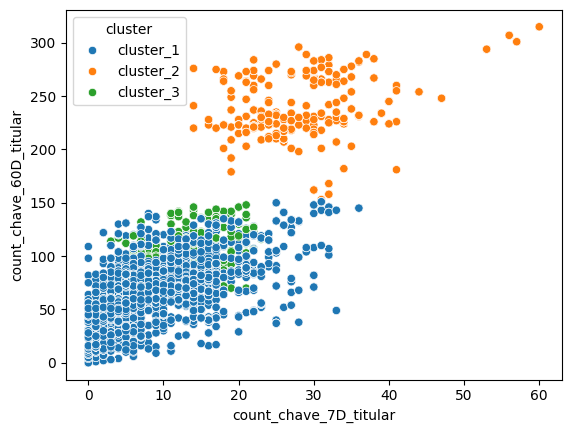

In [424]:
sns.scatterplot(x='count_chave_7D_titular', 
                y='count_chave_60D_titular', 
                data=dataset, 
                # hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3", "cluster_4"],  sizes=(100))
                                hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3"],  sizes=(100))
plt.show()

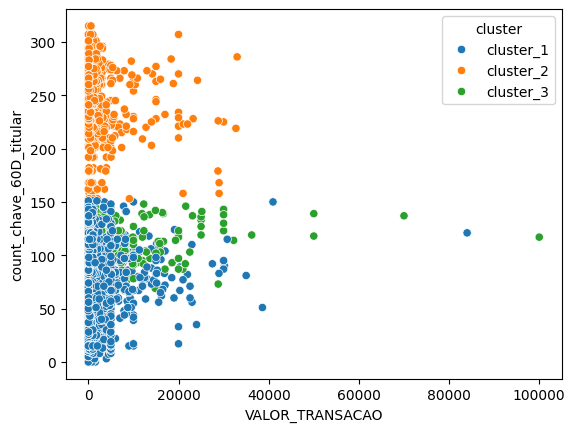

In [425]:
sns.scatterplot(x='VALOR_TRANSACAO', 
                y='count_chave_60D_titular', 
                data=dataset, 
                # hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3", "cluster_4"],  sizes=(100))
                                hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3"],  sizes=(100))
plt.show()

## TSNE

In [82]:
from sklearn.manifold import TSNE

In [83]:
tsne = TSNE(n_components=3, verbose=1, perplexity=30, n_iter=1000, n_jobs=-1)

In [84]:
X_reduce = tsne.fit_transform(dados_p)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5746 samples in 0.001s...
[t-SNE] Computed neighbors for 5746 samples in 0.221s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5746
[t-SNE] Computed conditional probabilities for sample 2000 / 5746
[t-SNE] Computed conditional probabilities for sample 3000 / 5746
[t-SNE] Computed conditional probabilities for sample 4000 / 5746
[t-SNE] Computed conditional probabilities for sample 5000 / 5746
[t-SNE] Computed conditional probabilities for sample 5746 / 5746
[t-SNE] Mean sigma: 0.059380
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.565586
[t-SNE] KL divergence after 1000 iterations: 0.301127


In [85]:
tsne_result_df = pd.DataFrame({'tsne_1': X_reduce[:,0], 'tsne_2': X_reduce[:,1], 'tsne_3': X_reduce[:,0]})

tsne_result_df = tsne_result_df.reset_index(drop=True)
data_tsne = dataset.reset_index(drop=True)

data_tsne = pd.concat([data_tsne, tsne_result_df], axis=1)
data_tsne.head()

,chave,Unnamed: 0,NUMERO_CASO,NUMERO_BANCO,NOME_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,NOME_TITULAR,DESCRICAO_LANCAMENTO,...,min_VALOR_TRANSACAO_7D_titular,min_VALOR_TRANSACAO_60D_titular,min_VALOR_TRANSACAO_180D_titular,std_VALOR_TRANSACAO_7D_titular,std_VALOR_TRANSACAO_60D_titular,std_VALOR_TRANSACAO_180D_titular,cluster,tsne_1,tsne_2,tsne_3
0,1,61,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,IOF,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,cluster_1,-28.469316,-6.623293,-28.469316
1,2,62,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,SEGURO RESIDENCIA 01/12,...,7.0,7.0,7.0,751.492903,751.492903,751.492903,cluster_1,-25.198523,-4.487586,-25.198523
2,3,63,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,LIS/JUROS,...,7.0,7.0,7.0,614.167947,614.167947,614.167947,cluster_1,-25.755230,-3.645912,-25.755230
3,5,65,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,CONSORC ITAU P018/080,...,38.0,7.0,7.0,486.885510,565.799925,565.799925,cluster_1,-25.241293,-3.613925,-25.241293
4,6,66,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,CXE 001024 SAQUE,...,102.0,7.0,7.0,667.313420,677.486844,677.486844,cluster_1,-22.455839,-3.827194,-22.455839


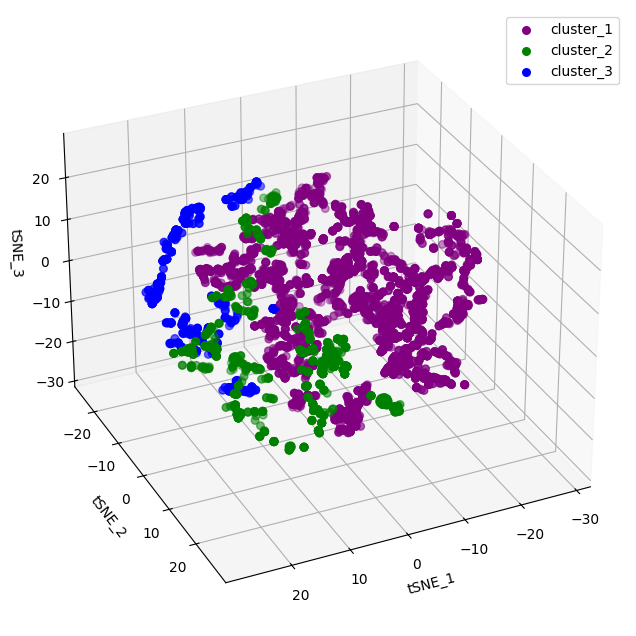

In [88]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("tSNE_3")
ax.set_ylabel("tSNE_2")
ax.set_xlabel("tSNE_1")



ax.scatter(X_reduce[data_tsne.cluster == 'cluster_1', 0], X_reduce[data_tsne.cluster == 'cluster_1', 1], zs=X_reduce[data_tsne.cluster == 'cluster_1', 2],
           lw=1,  c='Purple', s=30, label="cluster_1")


ax.scatter(X_reduce[data_tsne.cluster == 'cluster_2', 0], X_reduce[data_tsne.cluster == 'cluster_2', 1], zs=X_reduce[data_tsne.cluster == 'cluster_2', 2],
           lw=1,  c='Green', s=30, label="cluster_2")


ax.scatter(X_reduce[data_tsne.cluster == 'cluster_3', 0], X_reduce[data_tsne.cluster == 'cluster_3', 1], zs=X_reduce[data_tsne.cluster == 'cluster_3', 2],
           lw=1,  c='Blue', s=30, label="cluster_3")



ax.legend()

# Rotacionar o gráfico
ax.view_init(elev=30, azim=65)  # Elevação e azimute em graus

plt.show()

### Análise de Componentes Principais

In [120]:
pca = PCA(n_components=4, copy=True, whiten=False, svd_solver='auto', tol=0.0, 
          iterated_power='auto', random_state=42)

pca.fit(dados_p)

PCA(n_components=4, random_state=42)

In [121]:
pca.explained_variance_ratio_

array([0.64384836, 0.18443456, 0.05191771, 0.03147753])

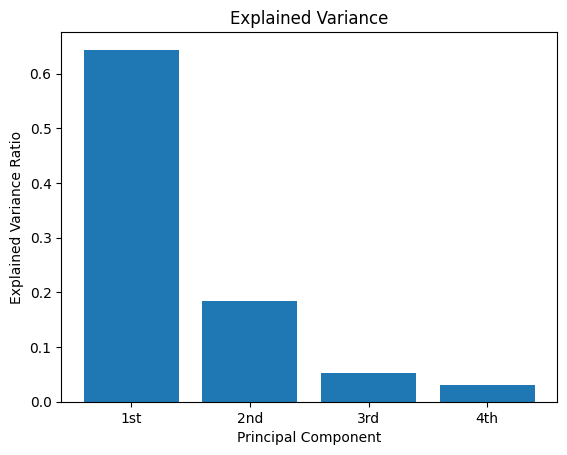

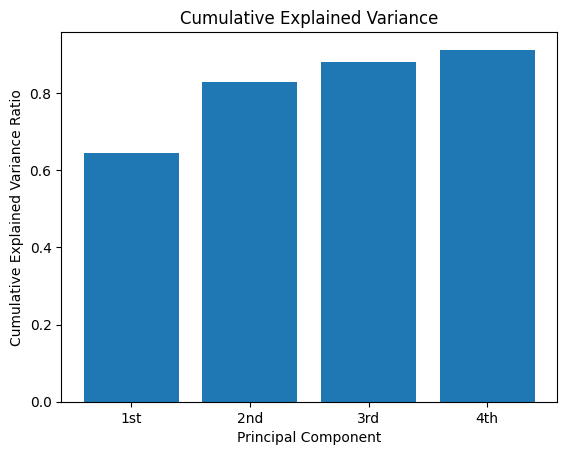

   Component  Explained Variance  Cumulative Explained Variance
0          1            0.643848                       0.643848
1          2            0.184435                       0.828283
2          3            0.051918                       0.880201
3          4            0.031478                       0.911678


In [122]:
range_x = np.arange(4)

plt.bar(range_x,pca.explained_variance_ratio_)
plt.xticks(range_x, ('1st', '2nd', '3rd', '4th'))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance')
plt.show()

plt.bar(range_x,np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range_x, ('1st', '2nd', '3rd', '4th'))
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.show()

d = {'Component': np.r_[1:len(pca.explained_variance_ratio_)+1], 
     'Explained Variance': pca.explained_variance_ratio_, 
     'Cumulative Explained Variance': np.cumsum(pca.explained_variance_ratio_)}
df = pd.DataFrame(data=d)

print(df)

Text(0, 0.5, 'Cumulative Explained Variance')

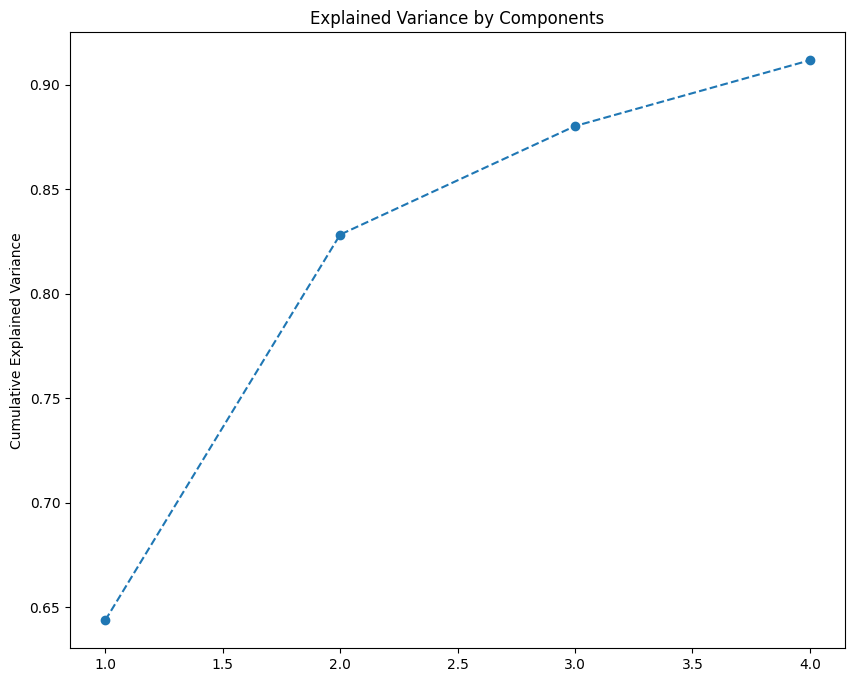

In [123]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance by Components")
plt.ylabel("Cumulative Explained Variance")

In [124]:
pca = PCA(n_components=2, random_state=42)

In [125]:
pca.fit(dados_p)

PCA(n_components=2, random_state=42)

In [126]:
score_pca = pca.fit_transform(dados_p)

In [127]:
column_names = ["PC_1", "PC_2"]
score_pca = pd.DataFrame(score_pca, columns=column_names)
score_pca

,PC_1,PC_2
0,-0.867104,-0.034562
1,-0.789486,-0.079973
2,-0.793922,-0.046021
3,-0.775106,-0.053607
4,-0.745991,-0.079257
...,...,...
5741,-0.158685,-0.190840
5742,-0.272171,-0.040449
5743,-0.268109,-0.128170
5744,-0.119437,-0.203393


In [97]:
d = pd.concat([score_pca, dataset], axis=1)
d.head()

,PC_1,PC_2,chave,Unnamed: 0,NUMERO_CASO,NUMERO_BANCO,NOME_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,...,max_VALOR_TRANSACAO_7D_titular,max_VALOR_TRANSACAO_60D_titular,max_VALOR_TRANSACAO_180D_titular,min_VALOR_TRANSACAO_7D_titular,min_VALOR_TRANSACAO_60D_titular,min_VALOR_TRANSACAO_180D_titular,std_VALOR_TRANSACAO_7D_titular,std_VALOR_TRANSACAO_60D_titular,std_VALOR_TRANSACAO_180D_titular,cluster
0,-0.867104,-0.034562,1,61,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,cluster_1
1,-0.789486,-0.079973,2,62,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,...,1546.0,1546.0,1546.0,7.0,7.0,7.0,751.492903,751.492903,751.492903,cluster_1
2,-0.793922,-0.046021,3,63,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,...,1546.0,1546.0,1546.0,7.0,7.0,7.0,614.167947,614.167947,614.167947,cluster_1
3,-0.775106,-0.053607,5,65,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,...,1040.0,1546.0,1546.0,38.0,7.0,7.0,486.885510,565.799925,565.799925,cluster_1
4,-0.745991,-0.079257,6,66,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,...,1896.0,1896.0,1896.0,102.0,7.0,7.0,667.313420,677.486844,677.486844,cluster_1


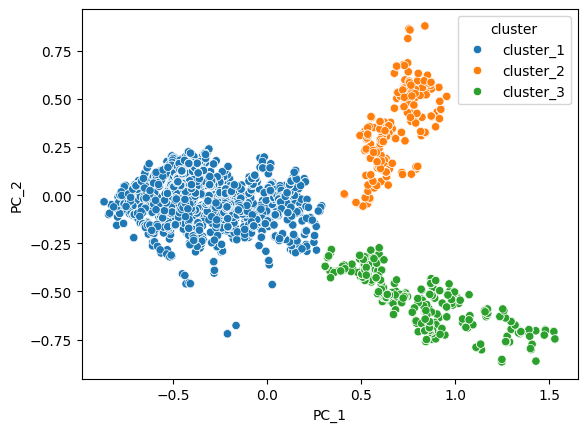

In [98]:
sns.scatterplot(x=d['PC_1'], 
                y=d['PC_2'], 
                data=d, 
                # hue='cluster', hue_order =  ["cluster_1", "cluster_2", "cluster_3", "cluster_4"],  sizes=(100))
                                hue='cluster', hue_order = ["cluster_1", "cluster_2", "cluster_3"],  sizes=(100))
plt.show()

Gráfico com 3 componentes principais

In [135]:
pca = PCA(n_components=3, random_state=43)
pca.fit(dados_p)

PCA(n_components=3, random_state=43)

In [141]:
pca.explained_variance_ratio_

array([0.64384836, 0.18443456, 0.05191771])

In [140]:
pca.explained_variance_ratio_.cumsum()

array([0.64384836, 0.82828292, 0.88020063])

In [136]:
score_pca = pca.fit_transform(dados_p)
column_names = ["PC_1", "PC_2", "PC_3"]
score_pca = pd.DataFrame(score_pca, columns=column_names)
score_pca

,PC_1,PC_2,PC_3
0,-0.867104,-0.034562,0.014291
1,-0.789486,-0.079973,0.019884
2,-0.793922,-0.046021,0.033827
3,-0.775106,-0.053607,0.023414
4,-0.745991,-0.079257,0.026752
...,...,...,...
5741,-0.158685,-0.190840,0.247362
5742,-0.272171,-0.040449,-0.014269
5743,-0.268109,-0.128170,0.014821
5744,-0.119437,-0.203393,0.001582


In [137]:
pca_components = pd.DataFrame(pca.components_, columns=dados.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(pca_components)

     VALOR_TRANSACAO  count_chave_7D_titular  count_chave_60D_titular  \
PC1         0.011778                0.185038                 0.317092   
PC2        -0.018075                0.320884                 0.471866   
PC3         0.009183                0.194715                 0.048940   

     count_chave_180D_titular  sum_VALOR_TRANSACAO_7D_titular  \
PC1                  0.348987                        0.151371   
PC2                  0.452149                       -0.021902   
PC3                 -0.111275                        0.455203   

     sum_VALOR_TRANSACAO_60D_titular  sum_VALOR_TRANSACAO_180D_titular  \
PC1                         0.356302                          0.500242   
PC2                         0.003393                          0.047248   
PC3                         0.104423                         -0.350609   

     mean_VALOR_TRANSACAO_7D_titular  mean_VALOR_TRANSACAO_60D_titular  \
PC1                         0.063919                          0.212614   
P

In [101]:
d = pd.concat([score_pca, dataset], axis=1)
d.head()

,PC_1,PC_2,PC_3,chave,Unnamed: 0,NUMERO_CASO,NUMERO_BANCO,NOME_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,...,max_VALOR_TRANSACAO_7D_titular,max_VALOR_TRANSACAO_60D_titular,max_VALOR_TRANSACAO_180D_titular,min_VALOR_TRANSACAO_7D_titular,min_VALOR_TRANSACAO_60D_titular,min_VALOR_TRANSACAO_180D_titular,std_VALOR_TRANSACAO_7D_titular,std_VALOR_TRANSACAO_60D_titular,std_VALOR_TRANSACAO_180D_titular,cluster
0,-0.867104,-0.034562,0.014291,1,61,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,cluster_1
1,-0.789486,-0.079973,0.019884,2,62,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,...,1546.0,1546.0,1546.0,7.0,7.0,7.0,751.492903,751.492903,751.492903,cluster_1
2,-0.793922,-0.046021,0.033827,3,63,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,...,1546.0,1546.0,1546.0,7.0,7.0,7.0,614.167947,614.167947,614.167947,cluster_1
3,-0.775106,-0.053607,0.023414,5,65,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,...,1040.0,1546.0,1546.0,38.0,7.0,7.0,486.885510,565.799925,565.799925,cluster_1
4,-0.745991,-0.079257,0.026752,6,66,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,...,1896.0,1896.0,1896.0,102.0,7.0,7.0,667.313420,677.486844,677.486844,cluster_1


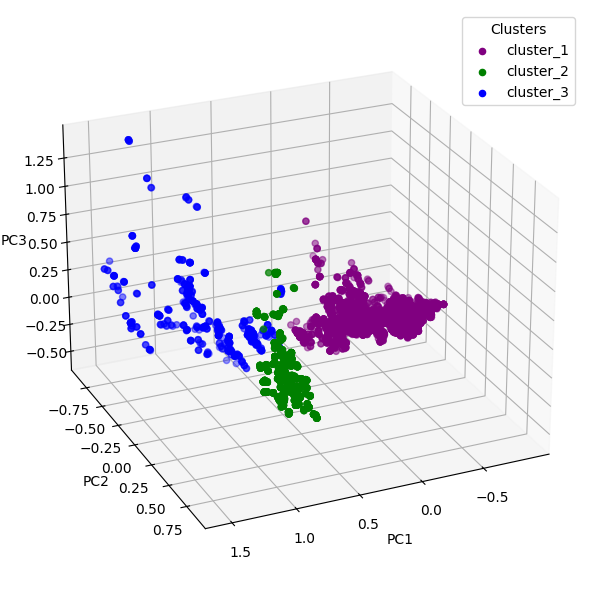

In [102]:
# Mapear rótulos de clusters para cores com opacidade
palette = {'cluster_1': "Purple",    # (0, 0, 1, 0.5) Cluster 1 com cor azul e opacidade de 0.5
           'cluster_2': "Green",  # (1, 0.5, 0, 0.5 Cluster 2 com cor laranja e opacidade de 0.5
           'cluster_3': "Blue"}    #(0, 1, 0, 0.5) Cluster 4 com cor vermelha e opacidade de 0.5

colors = [palette[c] for c in d.cluster]


# Criar figura e eixos 3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotar o gráfico 3D com scatter
sc = ax.scatter(d.PC_1, d.PC_2, d.PC_3, c=colors)



for cluster, color in palette.items():
    ax.scatter([], [], [], c=[color], label=cluster)

# Configurar rótulos dos eixos
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Exibir a legenda
ax.legend(title='Clusters')

ax.view_init(elev=25, azim=66) 
plt.tight_layout(pad=1)
# Exibir o gráfico
plt.show()

### Agrupamento Hierárquico 

In [142]:
dataset.head()

,chave,Unnamed: 0,NUMERO_CASO,NUMERO_BANCO,NOME_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,NOME_TITULAR,DESCRICAO_LANCAMENTO,...,max_VALOR_TRANSACAO_7D_titular,max_VALOR_TRANSACAO_60D_titular,max_VALOR_TRANSACAO_180D_titular,min_VALOR_TRANSACAO_7D_titular,min_VALOR_TRANSACAO_60D_titular,min_VALOR_TRANSACAO_180D_titular,std_VALOR_TRANSACAO_7D_titular,std_VALOR_TRANSACAO_60D_titular,std_VALOR_TRANSACAO_180D_titular,cluster
0,1,61,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,IOF,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,cluster_1
1,2,62,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,SEGURO RESIDENCIA 01/12,...,1546.0,1546.0,1546.0,7.0,7.0,7.0,751.492903,751.492903,751.492903,cluster_1
2,3,63,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,LIS/JUROS,...,1546.0,1546.0,1546.0,7.0,7.0,7.0,614.167947,614.167947,614.167947,cluster_1
3,5,65,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,CONSORC ITAU P018/080,...,1040.0,1546.0,1546.0,38.0,7.0,7.0,486.885510,565.799925,565.799925,cluster_1
4,6,66,0BB-PCSE-0000AA-34,341,ITAU UNIBANCO S/A,9H95,114418,1,MEVIO,CXE 001024 SAQUE,...,1896.0,1896.0,1896.0,102.0,7.0,7.0,667.313420,677.486844,677.486844,cluster_1


In [143]:
grouped = dataset.groupby(['NOME_TITULAR', 'cluster']).agg({'chave':'count'}).reset_index()
pivot_table = grouped.pivot_table(index='NOME_TITULAR', columns='cluster', values='chave', fill_value=0)
pivot_table.reset_index(inplace=True)
pivot_table.columns.name = None

In [144]:
pivot_table

,NOME_TITULAR,cluster_1,cluster_2,cluster_3
0,GIRASSOL,1132.0,0.0,0.0
1,MEVIO,1055.0,0.0,615.0
2,MEVIO FILHO,1138.0,1065.0,0.0
3,TÍCIO,741.0,0.0,0.0


In [145]:
pivot_table.loc[(pivot_table['NOME_TITULAR']=='GIRASSOL'), "NOME_TITULAR"] = 'INVESTIGADO_1'
pivot_table.loc[(pivot_table['NOME_TITULAR']=='MEVIO'), "NOME_TITULAR"] = 'INVESTIGADO_2'
pivot_table.loc[(pivot_table['NOME_TITULAR']=='MEVIO FILHO'), "NOME_TITULAR"] = 'INVESTIGADO_3'
pivot_table.loc[(pivot_table['NOME_TITULAR']=='TÍCIO'), "NOME_TITULAR"] = 'INVESTIGADO_4'

In [146]:
pivot_table

# o investigado 1 é caracterizado pelos clusters 1 e 3
# o investigado 2 é caracterizado pelos clusters 2 e 3
# o investigado 3 é caracterizado pelos clusters 1 e 2
# o investigado 4 é caracterizado pelos clusters 2

,NOME_TITULAR,cluster_1,cluster_2,cluster_3
0,INVESTIGADO_1,1132.0,0.0,0.0
1,INVESTIGADO_2,1055.0,0.0,615.0
2,INVESTIGADO_3,1138.0,1065.0,0.0
3,INVESTIGADO_4,741.0,0.0,0.0


In [154]:
1138/(1138 + 1065)

0.5165683159328189

In [156]:
(741)/(615 + 1132 + 1055 + 1138 + 741 + 1065)

0.12895927601809956

In [108]:
X = pivot_table.drop('NOME_TITULAR', axis=1)

# Padronizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

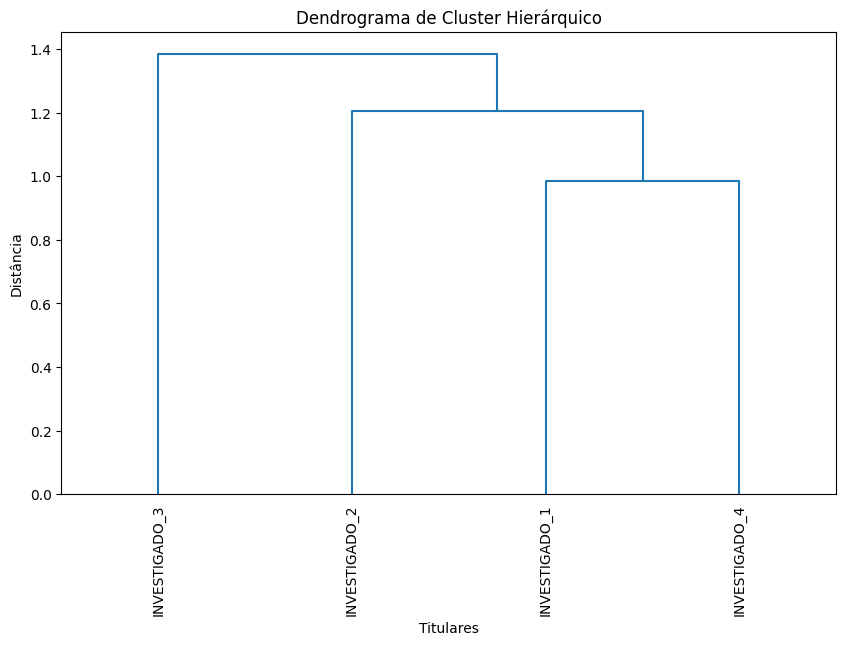

In [109]:
# Realizar o agrupamento hierárquico
Z = linkage(X_scaled, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=pivot_table['NOME_TITULAR'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrograma de Cluster Hierárquico')
plt.xlabel('Titulares')
plt.ylabel('Distância')
plt.show()

In [110]:
# os investigados 1 e 4 tem padrões de transações financeiras semelhantes

In [111]:
X 

,cluster_1,cluster_2,cluster_3
0,1132.0,0.0,0.0
1,1055.0,0.0,615.0
2,1138.0,1065.0,0.0
3,741.0,0.0,0.0


In [112]:
import scipy.stats as stats 
import prince
from adjustText import adjust_text



In [113]:
chi2, pvalor, graus_liberdade, valores_esperados = stats.chi2_contingency(X)
print(f'chi2 = {chi2:.2f} e p-valor = {pvalor:}')

chi2 = 3567.34 e p-valor = 0.0


In [114]:
# Criar e ajustar a análise de correspondência
ca = prince.CA(n_components=2)
ca = ca.fit(X)

# Exibir os componentes principais
print(ca.eigenvalues_)
print(ca.row_coordinates(X))  # Coordenadas das linhas
print(ca.column_coordinates(X))  # Coordenadas das colunas

[0.43021327 0.19062522]
          0         1
0 -0.184740  0.615673
1 -0.810478 -0.417379
2  0.771456 -0.207051
3 -0.184740  0.615673
                  0         1
cluster_1 -0.121172  0.268807
cluster_2  1.176167 -0.474228
cluster_3 -1.235661 -0.955961


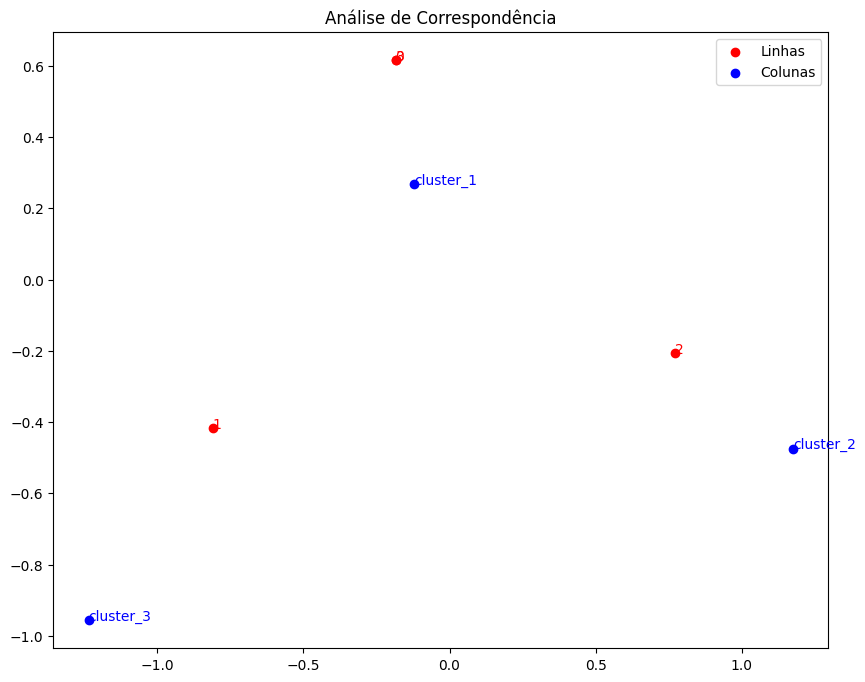

In [115]:
row_coords = ca.row_coordinates(X)
col_coords = ca.column_coordinates(X)

# Plotar as coordenadas das linhas e colunas
plt.figure(figsize=(10, 8))
plt.scatter(row_coords[0], row_coords[1], label='Linhas', color='red')
plt.scatter(col_coords[0], col_coords[1], label='Colunas', color='blue')

for i, row in row_coords.iterrows():
    plt.text(row[0], row[1], i, color='red')

for i, col in col_coords.iterrows():
    plt.text(col[0], col[1], i, color='blue')

plt.title('Análise de Correspondência')
plt.legend()
plt.show()

In [122]:
# instantiate MCA class
mca = prince.MCA(n_components = 2)

# get principal components
mca = mca.fit(X)

In [123]:
ax = mca.plot_coordinates(X)

AttributeError: 'MCA' object has no attribute 'plot_coordinates'

In [ ]:
# Instalar e carregar os pacotes
install.packages("FactoMineR")
install.packages("factoextra")

library(FactoMineR)
library(factoextra)

# Criar os dados em formato de texto
dados <- "

cluster_1	cluster_2	cluster_3
Investigated_1	1038.0	6.0	306.0
Investigated_2	1236.0	166.0	1452.0
Investigated_3	1784.0	2194.0	29.0
Investigated_4	882.0	33.0	103.0

"

# Ler os dados em um DataFrame
df <- read.table(text = dados, header = TRUE)

# Realizar a análise de correspondência
resultados_ca <- CA(df, graph = FALSE)  # Desativar gráfico automático

# Criar gráfico com vetores e pontos
grafico <- fviz_ca_biplot(resultados_ca, 
                          repel = TRUE,               # Evitar sobreposição de rótulos
                          col.ind = "red",           # Cor dos pontos
                          col.var = "blue",          # Cor dos vetores
                          ggtheme = theme_minimal() + theme(text = element_text(size = 12))) + 
  labs(title = "",
       x = "CA1",
       y = "CA2") +
  theme(plot.title = element_text(hjust = 0.5))  # Centralizar título

# Exibir o gráfico
print(grafico)


plot(resultados_ca)